## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.metrics import confusion_matrix
import seaborn as sb

## Loading University Rankings dataset


In [3]:
df = pd.read_csv('World University Rankings 2023.csv')
df.head()

University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

  No of student  No of student per staff International Student  \
0        20,965                     10.6                   42%   
1        21,887                      9.6                   25%   
2        20,185                     11.3                   39%   
3        16,164                      7.1                   24%   
4        11,415                      8.2                   33%   

  Female:Male Ratio OverAll Score  Teaching Score  Research Score  \
0           48 : 52          96.4            92.3            99.7   
1           50 : 50          95.2            94.8            99.0   
2           47 : 53          94.8            90.9            99.5   
3           46 : 54          94.8            94.2            96.7   
4           40 : 60          94.2            90.7            93.6   

   Citations Score  Industry Income Score  International Outlook Score  
0             99.0                   74.9                         96.2  
1             99.3                   49.5                         80.5  
2             97.0                   54.2                         95.8  
3             99.8                   65.0                         79.8  
4             99.8                   90.9                         89.3

In [4]:
df

University Rank                     Name of University        Location  \
0                  1                   University of Oxford  United Kingdom   
1                  2                     Harvard University   United States   
2                  3                University of Cambridge  United Kingdom   
3                  3                    Stanford University   United States   
4                  5  Massachusetts Institute of Technology   United States   
...              ...                                    ...             ...   
2336               -     University of the West of Scotland             NaN   
2337               -                  University of Windsor             NaN   
2338               -            University of Wolverhampton             NaN   
2339               -                University of Wuppertal             NaN   
2340               -    Xi’an Jiaotong-Liverpool University             NaN   

     No of student  No of student per staff International Student  \
0           20,965                     10.6                   42%   
1           21,887                      9.6                   25%   
2           20,185                     11.3                   39%   
3           16,164                      7.1                   24%   
4           11,415                      8.2                   33%   
...            ...                      ...                   ...   
2336           NaN                      NaN                   NaN   
2337           NaN                      NaN                   NaN   
2338           NaN                      NaN                   NaN   
2339           NaN                      NaN                   NaN   
2340           NaN                      NaN                   NaN   

     Female:Male Ratio OverAll Score  Teaching Score  Research Score  \
0              48 : 52          96.4            92.3            99.7   
1              50 : 50          95.2            94.8            99.0   
2              47 : 53          94.8            90.9            99.5   
3              46 : 54          94.8            94.2            96.7   
4              40 : 60          94.2            90.7            93.6   
...                ...           ...             ...             ...   
2336               NaN     34.0–39.2            24.1            15.5   
2337               NaN     34.0–39.2            35.1            29.4   
2338               NaN     34.0–39.2            18.2            14.3   
2339               NaN     34.0–39.2            26.4            26.7   
2340               NaN     34.0–39.2            17.8            14.8   

      Citations Score  Industry Income Score  International Outlook Score  
0                99.0                   74.9                         96.2  
1                99.3                   49.5                         80.5  
2                97.0                   54.2                         95.8  
3                99.8                   65.0                         79.8  
4                99.8                   90.9                         89.3  
...               ...                    ...                          ...  
2336             61.5                   37.9                         76.8  
2337             34.5                   44.2                         88.7  
2338             68.8                   37.3                         72.0  
2339             52.8                   52.1                         47.6  
2340             68.2                   38.2                         72.4  

[2341 rows x 13 columns]

## Data Preprocessing
We need to handle missing values, do encoding for categorical values and do scaling

### Handling Missing Values
1. Fill empty strings with NaN values

In [5]:
for col in df:
  df[col] = df[col].apply(lambda x: np.nan if x=='' else x)

   2. Now we will check the number of missing values in each features

In [6]:
df.isna().sum()

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

  3. Missing values in Name of University and Location can be handled by replacing NaN values with "Unknown".

In [7]:
# Filling missing values
df['Name of University'] = df['Name of University'].fillna('Unknown University')
df['Location'] = df['Location'].fillna('Unknown Location')

# Checking nan
df.isna().sum()

University Rank                  0
Name of University               0
Location                         0
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64

  4. Missing values in 'No of student per staff', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score' can be handled by replacing their NaN values with the mean of the feature.

In [8]:
# Filling NaN of those features with their mean
columnToFillWithMean = ['No of student per staff', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']
df[columnToFillWithMean] = df[columnToFillWithMean].fillna(df[columnToFillWithMean].mean(numeric_only=True))

# Checking NaN values
df.isna().sum()

University Rank                  0
Name of University               0
Location                         0
No of student                  132
No of student per staff          0
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                   0
Research Score                   0
Citations Score                  0
Industry Income Score            0
International Outlook Score      0
dtype: int64

  5. Now for rest of the features we have to encode them and then handle missing values.

### Data Encoding
  1. 'No of student' feature contains numeric value with commas. These are in normal value however in string format. For that we need to remove these commas and convert them into numeric values.

In [9]:
df['No of student'] = df['No of student'].str.replace(',', '').astype(float)

  2. 'International Student' contains the percentage. Hence it is important to convert for handling missing values. We will remove % symbol then convert string to float. Some rows contain empty strings so we will assign nan values to handle

In [10]:
# Remove % symbol
df['International Student'] = df['International Student'].str.rstrip('%')
# Convert to float and scale to fractional format (including handling empty strings)
df['International Student'] = df['International Student'].apply(lambda x: float(x) / 100 if x != '' else np.nan)
df.head()

University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

   No of student  No of student per staff  International Student  \
0        20965.0                     10.6                   0.42   
1        21887.0                      9.6                   0.25   
2        20185.0                     11.3                   0.39   
3        16164.0                      7.1                   0.24   
4        11415.0                      8.2                   0.33   

  Female:Male Ratio OverAll Score  Teaching Score  Research Score  \
0           48 : 52          96.4            92.3            99.7   
1           50 : 50          95.2            94.8            99.0   
2           47 : 53          94.8            90.9            99.5   
3           46 : 54          94.8            94.2            96.7   
4           40 : 60          94.2            90.7            93.6   

   Citations Score  Industry Income Score  International Outlook Score  
0             99.0                   74.9                         96.2  
1             99.3                   49.5                         80.5  
2             97.0                   54.2                         95.8  
3             99.8                   65.0                         79.8  
4             99.8                   90.9                         89.3

  3. Female:Male Ratio data needs to be encoded as well. We will seperate them to two new features as integers.

In [11]:
# Seperating female and male ratio columns
df[['Female Ratio', 'Male Ratio']] = df['Female:Male Ratio'].str.split(' : ', expand=True)

# Converting the split columns to float
df['Female Ratio'] = df['Female Ratio'].astype(float)
df['Male Ratio'] = df['Male Ratio'].astype(float)

# Drop Original Column
df.drop('Female:Male Ratio', axis=1, inplace=True)

df.head()

University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

   No of student  No of student per staff  International Student  \
0        20965.0                     10.6                   0.42   
1        21887.0                      9.6                   0.25   
2        20185.0                     11.3                   0.39   
3        16164.0                      7.1                   0.24   
4        11415.0                      8.2                   0.33   

  OverAll Score  Teaching Score  Research Score  Citations Score  \
0          96.4            92.3            99.7             99.0   
1          95.2            94.8            99.0             99.3   
2          94.8            90.9            99.5             97.0   
3          94.8            94.2            96.7             99.8   
4          94.2            90.7            93.6             99.8   

   Industry Income Score  International Outlook Score  Female Ratio  \
0                   74.9                         96.2          48.0   
1                   49.5                         80.5          50.0   
2                   54.2                         95.8          47.0   
3                   65.0                         79.8          46.0   
4                   90.9                         89.3          40.0   

   Male Ratio  
0        52.0  
1        50.0  
2        53.0  
3        54.0  
4        60.0

  4. OverAll Score feature contains both single numeric values and ranged values . So we can consider OverAll Score Min and Max.

In [12]:
# Function to split the values and create separate columns
def split_scores(score):
    if isinstance(score, str):
        split_values = score.split('–')
        min_val = float(split_values[0])
        max_val = float(split_values[1]) if len(split_values) == 2 else min_val
    else:
        min_val = max_val = float(score)
    return min_val, max_val

# Apply the function to create two separate Series
# We use the zip(*...) construct to unpack the resulting tuples into two separate Series, creating "OverAll Score Min" and "OverAll Score Max" columns simultaneously
df['OverAll Score Min'], df['OverAll Score Max'] = zip(*df['OverAll Score'].apply(split_scores))

# Convert the newly created columns to float
df['OverAll Score Min'] = df['OverAll Score Min'].astype(float)
df['OverAll Score Max'] = df['OverAll Score Max'].astype(float)

# Drop the original 'OverAll Score' column
df.drop('OverAll Score', axis=1, inplace=True)

df.head()

University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

   No of student  No of student per staff  International Student  \
0        20965.0                     10.6                   0.42   
1        21887.0                      9.6                   0.25   
2        20185.0                     11.3                   0.39   
3        16164.0                      7.1                   0.24   
4        11415.0                      8.2                   0.33   

   Teaching Score  Research Score  Citations Score  Industry Income Score  \
0            92.3            99.7             99.0                   74.9   
1            94.8            99.0             99.3                   49.5   
2            90.9            99.5             97.0                   54.2   
3            94.2            96.7             99.8                   65.0   
4            90.7            93.6             99.8                   90.9   

   International Outlook Score  Female Ratio  Male Ratio  OverAll Score Min  \
0                         96.2          48.0        52.0               96.4   
1                         80.5          50.0        50.0               95.2   
2                         95.8          47.0        53.0               94.8   
3                         79.8          46.0        54.0               94.8   
4                         89.3          40.0        60.0               94.2   

   OverAll Score Max  
0               96.4  
1               95.2  
2               94.8  
3               94.8  
4               94.2

In [13]:
df

University Rank                     Name of University          Location  \
0                  1                   University of Oxford    United Kingdom   
1                  2                     Harvard University     United States   
2                  3                University of Cambridge    United Kingdom   
3                  3                    Stanford University     United States   
4                  5  Massachusetts Institute of Technology     United States   
...              ...                                    ...               ...   
2336               -     University of the West of Scotland  Unknown Location   
2337               -                  University of Windsor  Unknown Location   
2338               -            University of Wolverhampton  Unknown Location   
2339               -                University of Wuppertal  Unknown Location   
2340               -    Xi’an Jiaotong-Liverpool University  Unknown Location   

      No of student  No of student per staff  International Student  \
0           20965.0                10.600000                   0.42   
1           21887.0                 9.600000                   0.25   
2           20185.0                11.300000                   0.39   
3           16164.0                 7.100000                   0.24   
4           11415.0                 8.200000                   0.33   
...             ...                      ...                    ...   
2336            NaN                19.000408                    NaN   
2337            NaN                19.000408                    NaN   
2338            NaN                19.000408                    NaN   
2339            NaN                19.000408                    NaN   
2340            NaN                19.000408                    NaN   

      Teaching Score  Research Score  Citations Score  Industry Income Score  \
0               92.3            99.7             99.0                   74.9   
1               94.8            99.0             99.3                   49.5   
2               90.9            99.5             97.0                   54.2   
3               94.2            96.7             99.8                   65.0   
4               90.7            93.6             99.8                   90.9   
...              ...             ...              ...                    ...   
2336            24.1            15.5             61.5                   37.9   
2337            35.1            29.4             34.5                   44.2   
2338            18.2            14.3             68.8                   37.3   
2339            26.4            26.7             52.8                   52.1   
2340            17.8            14.8             68.2                   38.2   

      International Outlook Score  Female Ratio  Male Ratio  \
0                            96.2          48.0        52.0   
1                            80.5          50.0        50.0   
2                            95.8          47.0        53.0   
3                            79.8          46.0        54.0   
4                            89.3          40.0        60.0   
...                           ...           ...         ...   
2336                         76.8           NaN         NaN   
2337                         88.7           NaN         NaN   
2338                         72.0           NaN         NaN   
2339                         47.6           NaN         NaN   
2340                         72.4           NaN         NaN   

      OverAll Score Min  OverAll Score Max  
0                  96.4               96.4  
1                  95.2               95.2  
2                  94.8               94.8  
3                  94.8               94.8  
4                  94.2               94.2  
...                 ...                ...  
2336               34.0               39.2  
2337               34.0               39.2  
2338               34.0               39.2  
2339       

## Loading NSS 2022 Dataset

In [14]:
df2 = pd.read_csv('nss2022.csv',encoding='latin1')
df2

UKPRN                       Provider  Agree (%)  Benchmark (%)  +/-  \
0    10007783         University of Aberdeen      85.63          77.74    +   
1    10007849             Abertay University      80.98          75.44    +   
2    10007856         Aberystwyth University      87.12          77.64    +   
3    10000055    Abingdon and Witney College      84.00          79.18  NaN   
4    10067648  University Academy 92 Limited      76.36          78.09  NaN   
..        ...                            ...        ...            ...  ...   
445       NaN                            NaN        NaN            NaN  NaN   
446       NaN                            NaN        NaN            NaN  NaN   
447       NaN                            NaN        NaN            NaN  NaN   
448       NaN                            NaN        NaN            NaN  NaN   
449       NaN                            NaN        NaN            NaN  NaN   

      Country  
0    Scotland  
1    Scotland  
2       Wales  
3     England  
4     England  
..        ...  
445       NaN  
446       NaN  
447       NaN  
448       NaN  
449       NaN  

[450 rows x 6 columns]

1. Remove the rows where Provider column has missing values

In [15]:
df2=df2.dropna(subset=['Provider'])

In [16]:
df2

UKPRN                            Provider  Agree (%)  Benchmark (%)  \
0    10007783              University of Aberdeen      85.63          77.74   
1    10007849                  Abertay University      80.98          75.44   
2    10007856              Aberystwyth University      87.12          77.64   
3    10000055         Abingdon and Witney College      84.00          79.18   
4    10067648       University Academy 92 Limited      76.36          78.09   
..        ...                                 ...        ...            ...   
430  10007709                        York College      80.00          73.28   
431  10007713             York St John University      79.30          75.89   
432  99999997           Medway School of Pharmacy      83.67          69.54   
433  99999998        Hull and York Medical School      64.71          75.84   
434  99999999  Brighton and Sussex Medical School      80.77          73.41   

     +/-   Country  
0      +  Scotland  
1      +  Scotland  
2      +     Wales  
3    NaN   England  
4    NaN   England  
..   ...       ...  
430  NaN   England  
431  NaN   England  
432  NaN   England  
433  NaN   England  
434  NaN   England  

[435 rows x 6 columns]

Merg df and df2 on Name of University and Provider for keeping only the rows with matching values in both dataframes.

In [17]:
merged_df = pd.merge(df, df2, left_on='Name of University', right_on='Provider', how='inner')
print(merged_df)

   University Rank                  Name of University          Location  \
0               29             University of Edinburgh    United Kingdom   
1               76               University of Bristol  Unknown Location   
2               82               University of Glasgow  Unknown Location   
3              108           University of Southampton    United Kingdom   
4              124     Queen Mary University of London    United Kingdom   
..             ...                                 ...               ...   
90        Reporter          Wrexham Glyndwr University    United Kingdom   
91        Reporter          Writtle University College    United Kingdom   
92        Reporter             York St John University    United Kingdom   
93               -  University of the West of Scotland  Unknown Location   
94               -         University of Wolverhampton  Unknown Location   

    No of student  No of student per staff  International Student  \
0         32845.0 

In [18]:
merged_df.head()

University Rank               Name of University          Location  \
0              29          University of Edinburgh    United Kingdom   
1              76            University of Bristol  Unknown Location   
2              82            University of Glasgow  Unknown Location   
3             108        University of Southampton    United Kingdom   
4             124  Queen Mary University of London    United Kingdom   

   No of student  No of student per staff  International Student  \
0        32845.0                     11.8                   0.47   
1        25680.0                     14.6                   0.31   
2        28540.0                     13.5                   0.41   
3        21175.0                     13.7                   0.39   
4        20505.0                     13.1                   0.46   

   Teaching Score  Research Score  Citations Score  Industry Income Score  \
0            66.9            74.5             97.1                   40.9   
1            43.8            53.4             98.6                   43.5   
2            43.3            50.8             96.5                   41.9   
3            41.4            47.5             92.3                   44.1   
4            34.3            41.3             97.7                   44.0   

   ...  Female Ratio  Male Ratio  OverAll Score Min  OverAll Score Max  \
0  ...          62.0        38.0               79.8               79.8   
1  ...          56.0        44.0               66.5               66.5   
2  ...          59.0        41.0               65.3               65.3   
3  ...          53.0        47.0               62.6               62.6   
4  ...          55.0        45.0               60.4               60.4   

      UKPRN                         Provider Agree (%)  Benchmark (%)  +/-  \
0  10007790          University of Edinburgh     72.81          77.62    -   
1  10007786            University of Bristol     74.39          77.69    -   
2  10007794            University of Glasgow     80.15          78.13  NaN   
3  10007158        University of Southampton     79.11          76.36  NaN   
4  10007775  Queen Mary University of London     72.97          76.21    -   

    Country  
0  Scotland  
1   England  
2  Scotland  
3   England  
4   England  

[5 rows x 21 columns]

In [19]:
import pandas as pd
import numpy as np

# Function to preprocess University Rank
def preprocess_university_rank(rank):
    if isinstance(rank, str):
        if '–' in rank:
            # Handle ranges by taking the lowest value
            return int(rank.split('–')[0])
        else:
            # Assign a large integer value for non-numeric ranks
            return 10000  # or another large number of any choice
    return rank

# Apply the preprocessing function to the University Rank column
merged_df['University Rank'] = merged_df['University Rank'].apply(preprocess_university_rank)

# Convert necessary columns to numeric if they are not already
for column in [
    'Agree (%)', 
    'OverAll Score Max', 
    'Male Ratio', 
    'Female Ratio', 
    'No of student per staff', 
    'Teaching Score', 
    'Research Score', 
    'Citations Score'
]:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

## Correlation Analysis

As there are many features associated with the [World University Rankings 2023.csv](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023) dataset, the following features are to be used for correlation analysis

AGREE (%) from NSS data 

VS 

[
    'University Rank', 
    'OverAll Score Max', 
    'Male Ratio', 
    'Female Ratio', 
    'No of student per staff', 
    'Teaching Score', 
    'Research Score', 
    'Citations Score'
]
from [World University Rankings 2023.csv](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023)

                         Agree (%)  University Rank  OverAll Score Max  \
Agree (%)                 1.000000        -0.415639           0.425210   
University Rank          -0.415639         1.000000          -0.990844   
OverAll Score Max         0.425210        -0.990844           1.000000   
Male Ratio                0.081780        -0.288536           0.265151   
Female Ratio             -0.081780         0.288536          -0.265151   
No of student per staff  -0.074270         0.148988          -0.167209   
Teaching Score            0.363910        -0.507267           0.554246   
Research Score            0.390287        -0.747805           0.785513   
Citations Score           0.315518        -0.891176           0.876396   

                         Male Ratio  Female Ratio  No of student per staff  \
Agree (%)                  0.081780     -0.081780                -0.074270   
University Rank           -0.288536      0.288536                 0.148988   
OverAll Score Max        

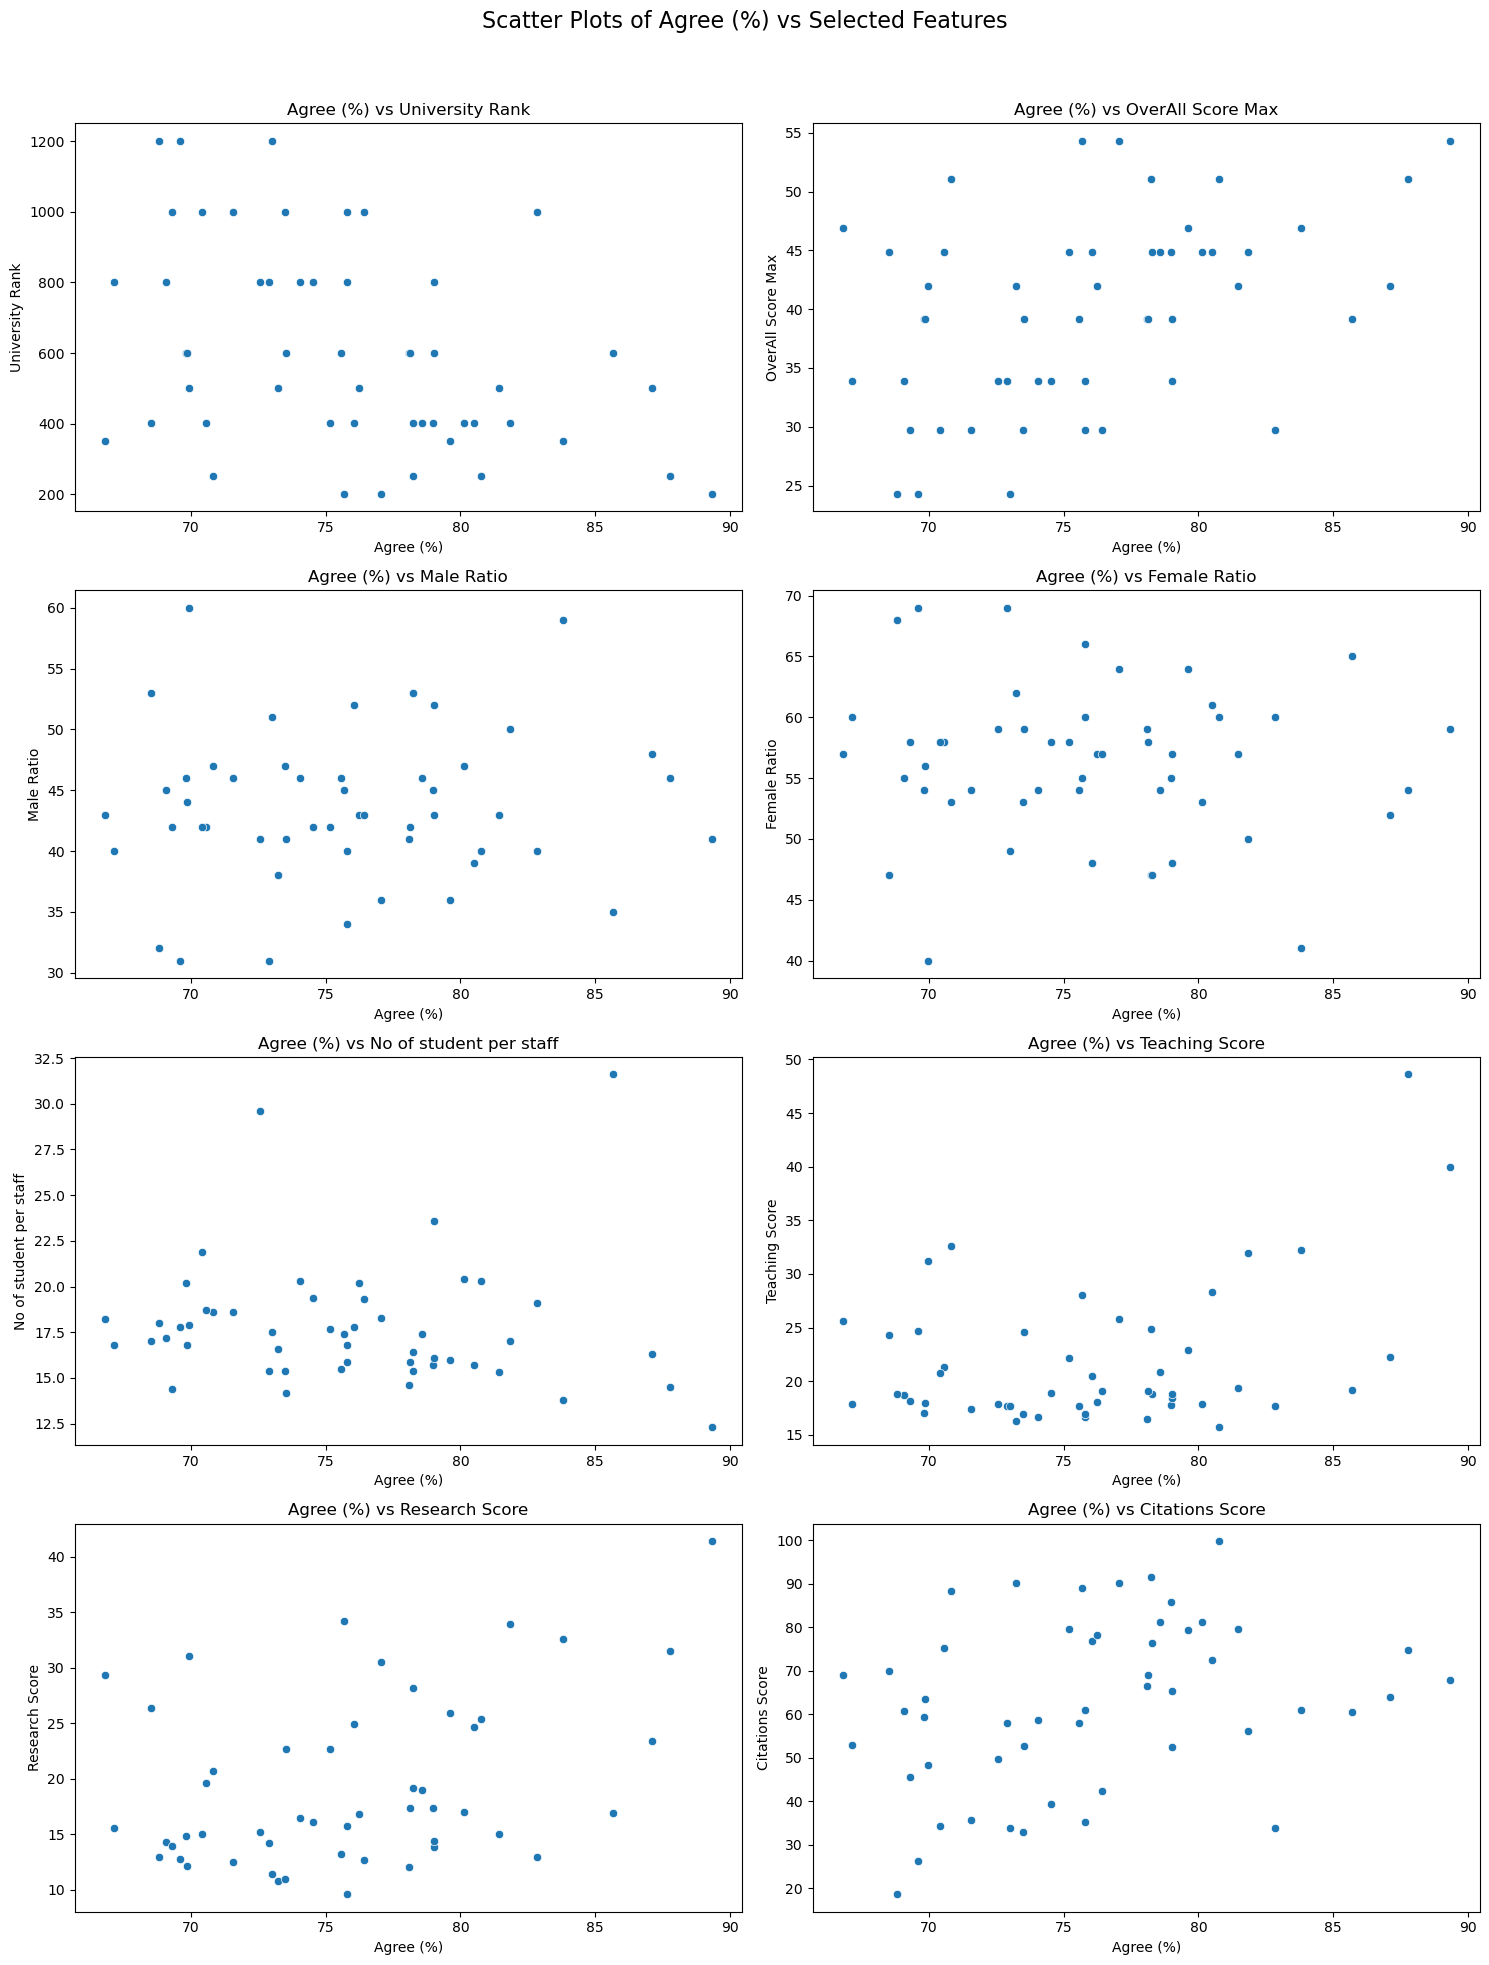

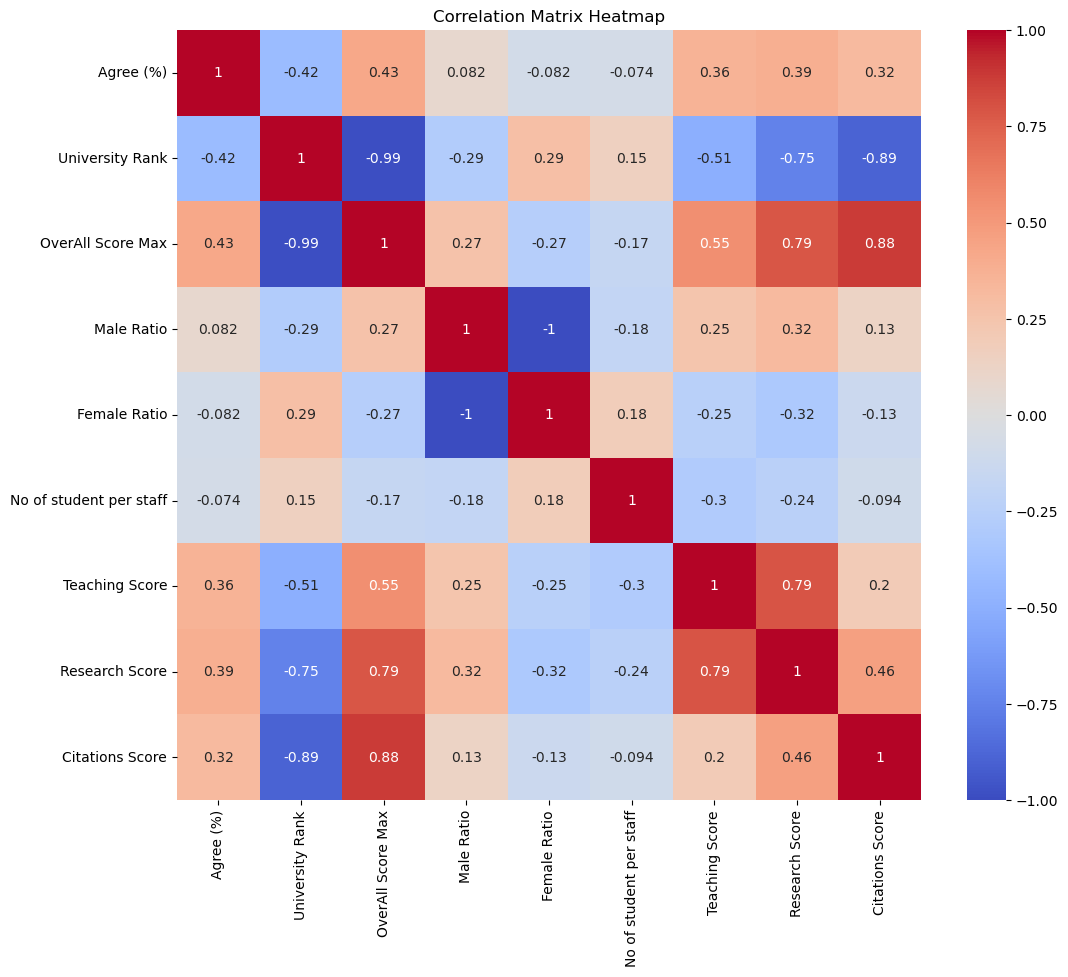

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is already defined and processed

# Filter out rows where University Rank is 10000
filtered_df = merged_df[merged_df['University Rank'] != 10000]

# Select relevant columns for correlation analysis
selected_columns = [
    'Agree (%)', 
    'University Rank',
    'OverAll Score Max', 
    'Male Ratio', 
    'Female Ratio', 
    'No of student per staff', 
    'Teaching Score', 
    'Research Score', 
    'Citations Score'
]

# Filter the DataFrame to include only the selected columns
correlation_df = filtered_df[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix = correlation_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Extract specific correlations
correlation_university_rank_agree = correlation_matrix.loc[ 'Agree (%)','University Rank']
correlation_agree_overall_score_max = correlation_matrix.loc['Agree (%)', 'OverAll Score Max']

print(f"Correlation between Agree (%) and University Rank : {correlation_university_rank_agree}")
print(f"Correlation between Agree (%) and Overall Score Max: {correlation_agree_overall_score_max}")

# Correlations between Agree (%) and other selected features
correlations_with_agree = correlation_matrix.loc['Agree (%)', [
    'Male Ratio', 
    'Female Ratio', 
    'No of student per staff', 
    'Teaching Score', 
    'Research Score', 
    'Citations Score'
]]

print("Correlations between Agree (%) and selected features:")
print(correlations_with_agree)

# Visualization

# Scatter plots between Agree (%) and selected features
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Scatter Plots of Agree (%) vs Selected Features', fontsize=16)

# List of features to plot against Agree (%)
features = [
    'University Rank', 
    'OverAll Score Max', 
    'Male Ratio', 
    'Female Ratio', 
    'No of student per staff', 
    'Teaching Score', 
    'Research Score', 
    'Citations Score'
]

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.scatterplot(ax=ax, x=filtered_df['Agree (%)'], y=filtered_df[feature])
    ax.set_title(f'Agree (%) vs {feature}')
    ax.set_xlabel('Agree (%)')
    ax.set_ylabel(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Correlation Analysis Interpretation
### 1. Correlation between University Rank and Agree (%): −0.415639

Interpretation: This indicates a moderate negative correlation between University Rank and the Agree (%) metric. As the university rank improves (lower rank number), the Agree (%) tends to increase, meaning better-ranked universities generally have higher agreement rates.

### 2. Correlation between Agree (%) and Overall Score Max: 0.425210

Interpretation: There is a moderate positive correlation between Agree (%) and Overall Score Max. This suggests that higher overall scores are associated with higher agreement percentages among students or faculty.

### 3. Correlations between Agree (%) and Selected Features

Male Ratio: 0.081780 - Very weak positive correlation. The male ratio does not significantly affect the agreement percentage.

Female Ratio: −0.081780 - Very weak negative correlation. Similar to the male ratio, the female ratio has a negligible impact on the agreement percentage.

No of student per staff: −0.074270 - Very weak negative correlation. The number of students per staff does not strongly influence the agreement percentage.

Teaching Score: 0.363910 - Moderate positive correlation. Higher teaching scores are moderately associated with higher agreement percentages.

Research Score: 0.390287 - Moderate positive correlation. Universities with higher research scores tend to have higher agreement percentages.

Citations Score: 0.315518 - Moderate positive correlation. Universities with higher citation scores also tend to have higher agreement percentages.

In [21]:
df3 = pd.read_csv('NSS_taught_all22.csv',encoding='latin1')
df3

ï»¿UKPRN                            Provider Question Number  \
0      10007783              University of Aberdeen             Q01   
1      10007783              University of Aberdeen             Q02   
2      10007783              University of Aberdeen             Q03   
3      10007783              University of Aberdeen             Q04   
4      10007783              University of Aberdeen         Scale01   
...         ...                                 ...             ...   
15185  99999999  Brighton and Sussex Medical School             Q24   
15186  99999999  Brighton and Sussex Medical School             Q25   
15187  99999999  Brighton and Sussex Medical School         Scale08   
15188  99999999  Brighton and Sussex Medical School             Q26   
15189  99999999  Brighton and Sussex Medical School             Q27   

      Answered 1 Answered 2 Answered 3 Answered 4 Answered 5  N/A  \
0             1%         3%         6%        59%        31%    5   
1             1%         5%        10%        53%        31%    2   
2             1%         2%         8%        40%        48%    2   
3             1%         5%        12%        41%        39%    2   
4             1%         4%         9%        48%        37%   11   
...          ...        ...        ...        ...        ...  ...   
15185        13%        11%        14%        22%        40%    0   
15186        13%        11%        16%        27%        33%    0   
15187        10%         9%        11%        24%        45%    0   
15188         8%         5%        32%        26%        30%    3   
15189         5%        11%         4%        32%        49%    0   

      Confidence interval - min Actual value Confidence interval - max  \
0                           89%          90%                       92%   
1                           81%          84%                       86%   
2                           86%          88%                       90%   
3                           79%          81%                       83%   
4                           84%          86%                       88%   
...                         ...          ...                       ...   
15185                       52%          63%                       72%   
15186                       49%          60%                       69%   
15187                       59%          70%                       78%   
15188                       45%          55%                       66%   
15189                       71%          81%                       88%   

       Response  Sample Size  
0          1448         2155  
1          1451         2155  
2          1451         2155  
3          1451         2155  
4          1453         2155  
...         ...          ...  
15185       104          136  
15186       104          136  
15187       104          136  
15188       101          136  
15189       104          136  

[15190 rows x 14 columns]

In [22]:
df

University Rank                     Name of University          Location  \
0                  1                   University of Oxford    United Kingdom   
1                  2                     Harvard University     United States   
2                  3                University of Cambridge    United Kingdom   
3                  3                    Stanford University     United States   
4                  5  Massachusetts Institute of Technology     United States   
...              ...                                    ...               ...   
2336               -     University of the West of Scotland  Unknown Location   
2337               -                  University of Windsor  Unknown Location   
2338               -            University of Wolverhampton  Unknown Location   
2339               -                University of Wuppertal  Unknown Location   
2340               -    Xi’an Jiaotong-Liverpool University  Unknown Location   

      No of student  No of student per staff  International Student  \
0           20965.0                10.600000                   0.42   
1           21887.0                 9.600000                   0.25   
2           20185.0                11.300000                   0.39   
3           16164.0                 7.100000                   0.24   
4           11415.0                 8.200000                   0.33   
...             ...                      ...                    ...   
2336            NaN                19.000408                    NaN   
2337            NaN                19.000408                    NaN   
2338            NaN                19.000408                    NaN   
2339            NaN                19.000408                    NaN   
2340            NaN                19.000408                    NaN   

      Teaching Score  Research Score  Citations Score  Industry Income Score  \
0               92.3            99.7             99.0                   74.9   
1               94.8            99.0             99.3                   49.5   
2               90.9            99.5             97.0                   54.2   
3               94.2            96.7             99.8                   65.0   
4               90.7            93.6             99.8                   90.9   
...              ...             ...              ...                    ...   
2336            24.1            15.5             61.5                   37.9   
2337            35.1            29.4             34.5                   44.2   
2338            18.2            14.3             68.8                   37.3   
2339            26.4            26.7             52.8                   52.1   
2340            17.8            14.8             68.2                   38.2   

      International Outlook Score  Female Ratio  Male Ratio  \
0                            96.2          48.0        52.0   
1                            80.5          50.0        50.0   
2                            95.8          47.0        53.0   
3                            79.8          46.0        54.0   
4                            89.3          40.0        60.0   
...                           ...           ...         ...   
2336                         76.8           NaN         NaN   
2337                         88.7           NaN         NaN   
2338                         72.0           NaN         NaN   
2339                         47.6           NaN         NaN   
2340                         72.4           NaN         NaN   

      OverAll Score Min  OverAll Score Max  
0                  96.4               96.4  
1                  95.2               95.2  
2                  94.8               94.8  
3                  94.8               94.8  
4                  94.2               94.2  
...                 ...                ...  
2336               34.0               39.2  
2337               34.0               39.2  
2338               34.0               39.2  
2339       

In [23]:
merged_df2 = pd.merge(df3, df, left_on='Provider', right_on='Name of University', how='inner')

In [24]:
merged_df2

ï»¿UKPRN                            Provider Question Number Answered 1  \
0     10007783              University of Aberdeen             Q01         1%   
1     10007783              University of Aberdeen             Q02         1%   
2     10007783              University of Aberdeen             Q03         1%   
3     10007783              University of Aberdeen             Q04         1%   
4     10007783              University of Aberdeen         Scale01         1%   
...        ...                                 ...             ...        ...   
3285  99999999  Brighton and Sussex Medical School             Q24        13%   
3286  99999999  Brighton and Sussex Medical School             Q25        13%   
3287  99999999  Brighton and Sussex Medical School         Scale08        10%   
3288  99999999  Brighton and Sussex Medical School             Q26         8%   
3289  99999999  Brighton and Sussex Medical School             Q27         5%   

     Answered 2 Answered 3 Answered 4 Answered 5  N/A  \
0            3%         6%        59%        31%    5   
1            5%        10%        53%        31%    2   
2            2%         8%        40%        48%    2   
3            5%        12%        41%        39%    2   
4            4%         9%        48%        37%   11   
...         ...        ...        ...        ...  ...   
3285        11%        14%        22%        40%    0   
3286        11%        16%        27%        33%    0   
3287         9%        11%        24%        45%    0   
3288         5%        32%        26%        30%    3   
3289        11%         4%        32%        49%    0   

     Confidence interval - min  ... International Student Teaching Score  \
0                          89%  ...                  0.44           30.7   
1                          81%  ...                  0.44           30.7   
2                          86%  ...                  0.44           30.7   
3                          79%  ...                  0.44           30.7   
4                          84%  ...                  0.44           30.7   
...                        ...  ...                   ...            ...   
3285                       52%  ...                  0.17           15.7   
3286                       49%  ...                  0.17           15.7   
3287                       59%  ...                  0.17           15.7   
3288                       45%  ...                  0.17           15.7   
3289                       71%  ...                  0.17           15.7   

      Research Score  Citations Score Industry Income Score  \
0               34.1             89.8                  47.5   
1               34.1             89.8                  47.5   
2               34.1             89.8                  47.5   
3               34.1             89.8                  47.5   
4               34.1             89.8                  47.5   
...              ...              ...                   ...   
3285            25.4             99.8                  36.9   
3286            25.4             99.8                  36.9   
3287            25.4             99.8                  36.9   
3288            25.4             99.8                  36.9   
3289            25.4             99.8                  36.9   

     International Outlook Score Female Ratio  Male Ratio  OverAll Score Min  \
0                           95.9         58.0        42.0               54.8   
1                           95.9         58.0        42.0               54.8   
2                           95.9         58.0        42.0               54.8   
3                           95.9         58.0        42.0               54.8   
4                           95.9         58.0        42.0               54.8   
...                          ...          ...         ...                ...   
3285                        81.1         60.0        40.0               48.9   
3286                        81.1      

In [25]:
print(merged_df2)

      ï»¿UKPRN                            Provider Question Number Answered 1  \
0     10007783              University of Aberdeen             Q01         1%   
1     10007783              University of Aberdeen             Q02         1%   
2     10007783              University of Aberdeen             Q03         1%   
3     10007783              University of Aberdeen             Q04         1%   
4     10007783              University of Aberdeen         Scale01         1%   
...        ...                                 ...             ...        ...   
3285  99999999  Brighton and Sussex Medical School             Q24        13%   
3286  99999999  Brighton and Sussex Medical School             Q25        13%   
3287  99999999  Brighton and Sussex Medical School         Scale08        10%   
3288  99999999  Brighton and Sussex Medical School             Q26         8%   
3289  99999999  Brighton and Sussex Medical School             Q27         5%   

     Answered 2 Answered 3 

In [26]:
merged_df2.to_csv("Merged.csv")

In [27]:
merged_df2 = merged_df2[merged_df2['Location'] == "United Kingdom"]

In [28]:
merged_df2

ï»¿UKPRN                            Provider Question Number Answered 1  \
0     10007783              University of Aberdeen             Q01         1%   
1     10007783              University of Aberdeen             Q02         1%   
2     10007783              University of Aberdeen             Q03         1%   
3     10007783              University of Aberdeen             Q04         1%   
4     10007783              University of Aberdeen         Scale01         1%   
...        ...                                 ...             ...        ...   
3285  99999999  Brighton and Sussex Medical School             Q24        13%   
3286  99999999  Brighton and Sussex Medical School             Q25        13%   
3287  99999999  Brighton and Sussex Medical School         Scale08        10%   
3288  99999999  Brighton and Sussex Medical School             Q26         8%   
3289  99999999  Brighton and Sussex Medical School             Q27         5%   

     Answered 2 Answered 3 Answered 4 Answered 5  N/A  \
0            3%         6%        59%        31%    5   
1            5%        10%        53%        31%    2   
2            2%         8%        40%        48%    2   
3            5%        12%        41%        39%    2   
4            4%         9%        48%        37%   11   
...         ...        ...        ...        ...  ...   
3285        11%        14%        22%        40%    0   
3286        11%        16%        27%        33%    0   
3287         9%        11%        24%        45%    0   
3288         5%        32%        26%        30%    3   
3289        11%         4%        32%        49%    0   

     Confidence interval - min  ... International Student Teaching Score  \
0                          89%  ...                  0.44           30.7   
1                          81%  ...                  0.44           30.7   
2                          86%  ...                  0.44           30.7   
3                          79%  ...                  0.44           30.7   
4                          84%  ...                  0.44           30.7   
...                        ...  ...                   ...            ...   
3285                       52%  ...                  0.17           15.7   
3286                       49%  ...                  0.17           15.7   
3287                       59%  ...                  0.17           15.7   
3288                       45%  ...                  0.17           15.7   
3289                       71%  ...                  0.17           15.7   

      Research Score  Citations Score Industry Income Score  \
0               34.1             89.8                  47.5   
1               34.1             89.8                  47.5   
2               34.1             89.8                  47.5   
3               34.1             89.8                  47.5   
4               34.1             89.8                  47.5   
...              ...              ...                   ...   
3285            25.4             99.8                  36.9   
3286            25.4             99.8                  36.9   
3287            25.4             99.8                  36.9   
3288            25.4             99.8                  36.9   
3289            25.4             99.8                  36.9   

     International Outlook Score Female Ratio  Male Ratio  OverAll Score Min  \
0                           95.9         58.0        42.0               54.8   
1                           95.9         58.0        42.0               54.8   
2                           95.9         58.0        42.0               54.8   
3                           95.9         58.0        42.0               54.8   
4                           95.9         58.0        42.0               54.8   
...                          ...          ...         ...                ...   
3285                        81.1         60.0        40.0               48.9   
3286                        81.1      

Full list of NSS questions

The teaching on my course (Scale01)
 - 1 Staff are good at explaining things
 - 2 Staff have made the subject interesting
 - 3 The course is intellectually stimulating
 - 4 My course has challenged me to achieve my best work

Learning opportunities (Scale02)
- 5 My course has provided me with opportunities to explore ideas or concepts in depth
- 6 My course has provided me with opportunities to bring information and ideas together from different topics
- 7 My course has provided me with opportunities to apply what I have learnt

Assessment and feedback (Scale03)
- 8 The criteria used in marking have been clear in advance
- 9 Marking and assessment has been fair
- 10 Feedback on my work has been timely
- 11 I have received helpful comments on my work

Academic support (Scale04)
- 12 I have been able to contact staff when I needed to
- 13 I have received sufficient advice and guidance in relation to my course
- 14 Good advice was available when I needed to make study choices on my course

Organisation and management (Scale05)
- 15 The course is well organised and running smoothly
- 16 The timetable works efficiently for me
- 17 Any changes in the course or teaching have been communicated effectively

Learning resources (Scale06)
- 18 The IT resources and facilities provided have supported my learning well
- 19 The library resources (e.g. books, online services and learning spaces) have supported my learning well
- 20 I have been able to access course-specific resources (e.g. equipment, facilities, software, collections) when I needed to

Learning community (Scale07)
- 21 I feel part of a community of staff and students
- 22 I have had the right opportunities to work with other students as part of my course

Student voice (Scale08)
- 23 I have had the right opportunities to provide feedback on my course
- 24 Staff value students’ views and opinions about the course
- 25 It is clear how students’ feedback on the course has been acted on

Students' union (Q26)
- 26 The students’ union (association or guild) effectively represents students’ academic interests

Overall satisfaction (Q27)
- 27 Overall, I am satisfied with the quality of the course

Ans1 (totally disagree), ans2 (disagree), ans3(neutral),  ans4(agree), ans5(totally agree)

In [29]:
import pandas as pd
import re
merged_df2['University Rank'] = merged_df2['University Rank'].apply(preprocess_university_rank)
merged_df2 = merged_df2[merged_df2['University Rank'] != 10000]

# Assuming data is stored in a DataFrame called merged_df2

# Function to extract numeric value from percentage string
def extract_numeric_percentage(value):
    # Extract numeric part from percentage string
    return float(re.findall(r'\d+\.\d+|\d+', value)[0])

# Convert 'Actual value' column to numeric
merged_df2['Actual value'] = merged_df2['Actual value'].apply(extract_numeric_percentage)

# Calculate correlations between 'Actual value' and 'University Rank' for each question
correlations = {}
questions = merged_df2['Question Number'].unique()

for question in questions:
    df_question = merged_df2[merged_df2['Question Number'] == question]
    correlation = df_question['Actual value'].corr(df_question['University Rank'])
    correlations[question] = correlation

# Convert correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Question Number', 'Correlation'])

# Sort correlations by absolute correlation value
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)

print(correlations_df)


   Question Number  Correlation  Abs Correlation
2              Q03    -0.454983         0.454983
14             Q12    -0.451546         0.451546
11             Q10     0.446571         0.446571
21         Scale05    -0.434088         0.434088
20             Q17    -0.434080         0.434080
18             Q15    -0.403796         0.403796
34             Q27    -0.402897         0.402897
13         Scale03     0.370033         0.370033
24             Q20    -0.360460         0.360460
12             Q11     0.357049         0.357049
19             Q16    -0.350747         0.350747
25         Scale06    -0.331934         0.331934
29             Q23    -0.329744         0.329744
22             Q18    -0.314042         0.314042
0              Q01    -0.270573         0.270573
9              Q08     0.252132         0.252132
4          Scale01    -0.226647         0.226647
5              Q05    -0.208506         0.208506
23             Q19    -0.205694         0.205694
10             Q09  

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/2158094671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['University Rank'] = merged_df2['University Rank'].apply(preprocess_university_rank)
/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/2158094671.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['Actual value'] = merged_df2['Actual value'].apply(extract_numeric_percentage)


Ouput shows the correlations between each question's agreement percentage ('Actual value') and the university rank, sorted by the absolute correlation value. Here's how to interpret:

1. **Question Number**: This column lists the unique identifiers for each question or scale (like Q01, Q02, Scale01, etc.).

2. **Correlation**: This column represents the correlation coefficient between the 'Actual value' (percentage agreement to the question) and the 'University Rank'. The correlation coefficient ranges from -1 to 1:
   - A correlation coefficient close to 1 indicates a strong positive relationship, meaning as the agreement percentage increases, so does the university rank.
   - A correlation coefficient close to -1 indicates a strong negative relationship, meaning as the agreement percentage increases, the university rank decreases.
   - A correlation coefficient close to 0 indicates no linear relationship.

3. **Abs Correlation**: This column simply shows the absolute value of the correlation coefficient, which helps to identify the questions with the strongest overall relationship (positive or negative) with university rank.

### Key Findings:
- Questions or scales like Q12, Q03, Scale05, Q17, and Q27 have the strongest negative correlations with university rank. This suggests that as the agreement percentage for these questions increases, the university rank tends to decrease.
  
- Conversely, questions like Q10, Q11, Q08, and Q09 show positive correlations with university rank, indicating that higher agreement percentages for these questions tend to be associated with higher university ranks.

- Questions with correlations closer to zero (e.g., Q01, Q04, Q13) have weaker relationships with university rank.


In [30]:
import pandas as pd

# Filter rows containing Scale data (assuming Scale01 to Scale08 are in 'Question Number')
scale_questions = ['Scale01', 'Scale02', 'Scale03', 'Scale04', 'Scale05', 'Scale06', 'Scale07', 'Scale08']
scale_data = merged_df2[merged_df2['Question Number'].isin(scale_questions)]

# Convert 'Actual value' column to numeric
#scale_data['Actual value'] = scale_data['Actual value'].apply(lambda x: float(x.strip('%')))

# Calculate correlations between each scale and 'University Rank'
correlations = {}

for scale in scale_questions:
    df_scale = scale_data[scale_data['Question Number'] == scale]
    correlation = df_scale['Actual value'].corr(df_scale['University Rank'])
    correlations[scale] = correlation

# Convert correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Scale', 'Correlation'])

# Sort correlations by absolute correlation value (optional)
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)

print(correlations_df)


     Scale  Correlation  Abs Correlation
4  Scale05    -0.434088         0.434088
2  Scale03     0.370033         0.370033
5  Scale06    -0.331934         0.331934
0  Scale01    -0.226647         0.226647
3  Scale04    -0.146416         0.146416
1  Scale02    -0.057939         0.057939
7  Scale08    -0.037036         0.037036
6  Scale07    -0.000044         0.000044


### Key Insights:
- **Scale05** has the strongest negative correlation with university rank (-0.43), meaning higher agreement percentages for Scale05 are associated with lower university ranks.
  
- **Scale03** shows a moderate positive correlation (0.37), indicating that higher agreement percentages for Scale03 are associated with higher university ranks.

- **Scale01, Scale04, Scale06, Scale02, Scale08, and Scale07** also exhibit negative correlations with varying strengths, suggesting that higher agreement percentages for these scales generally correlate with lower university ranks.


/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


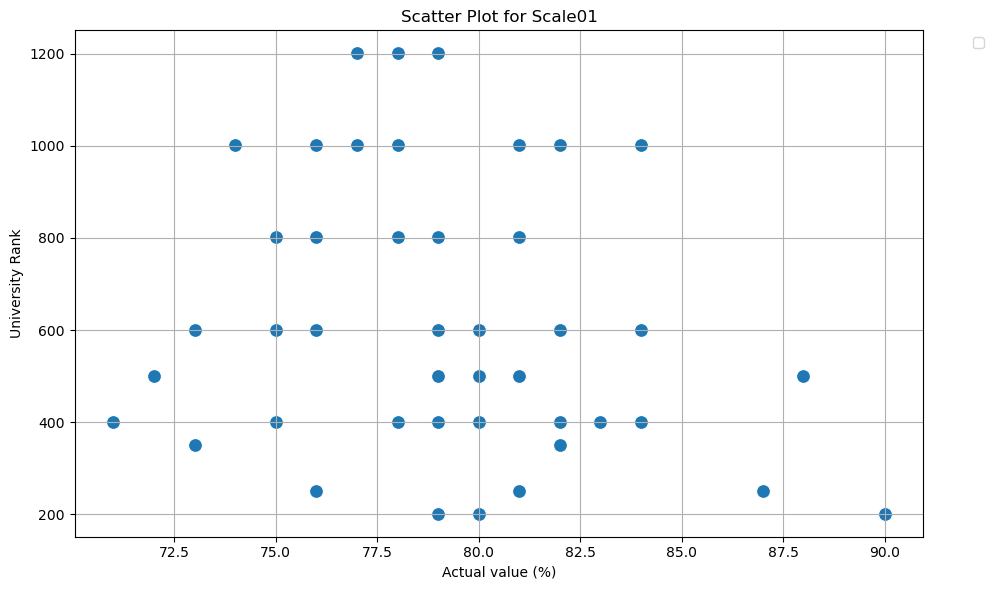

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


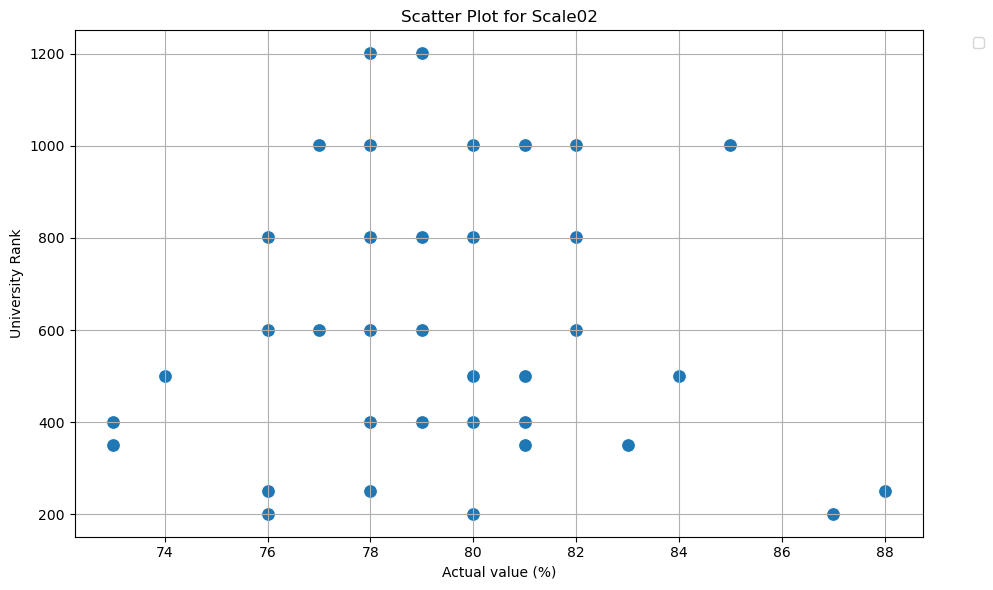

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


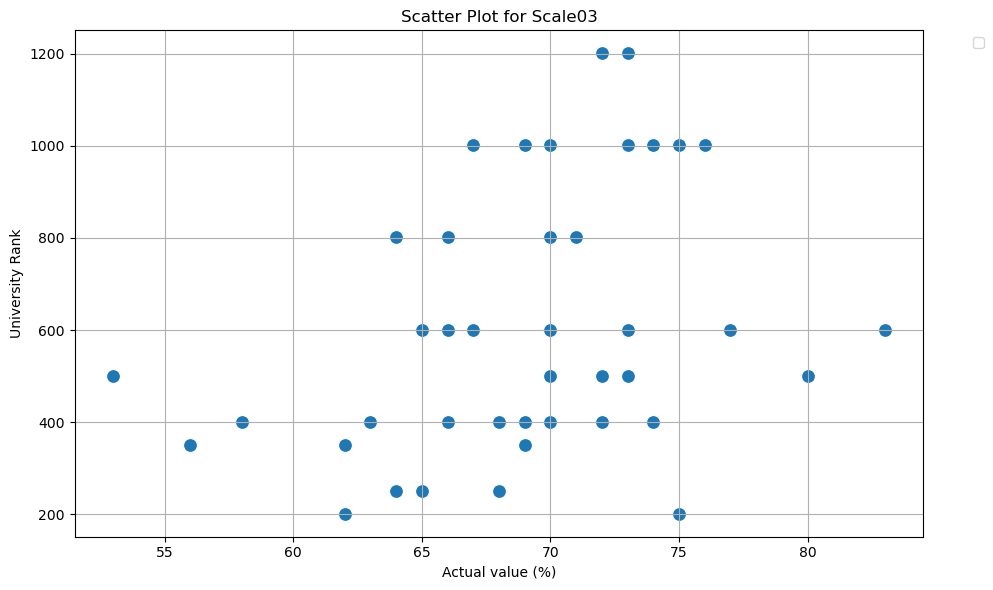

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


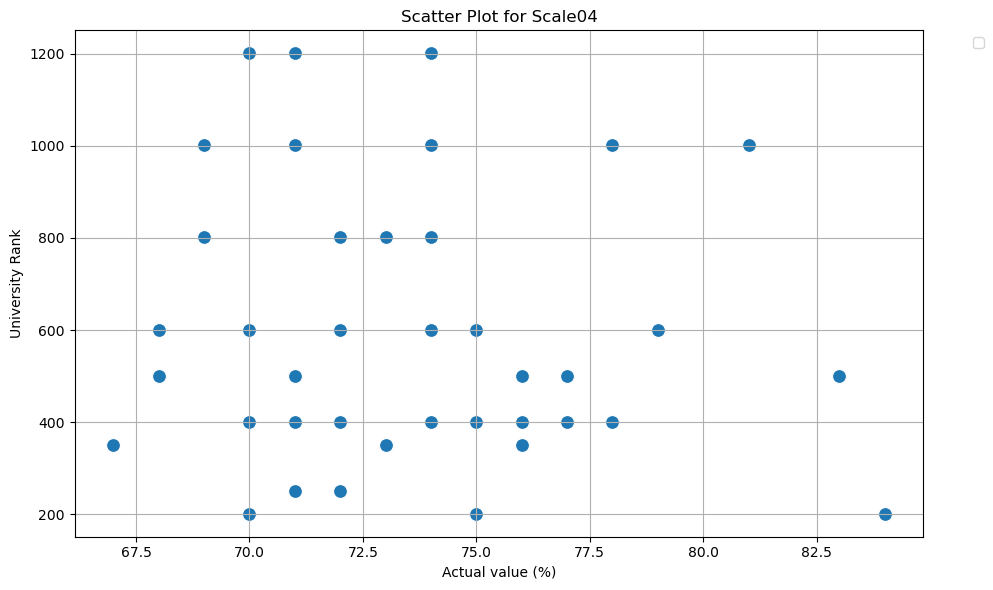

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


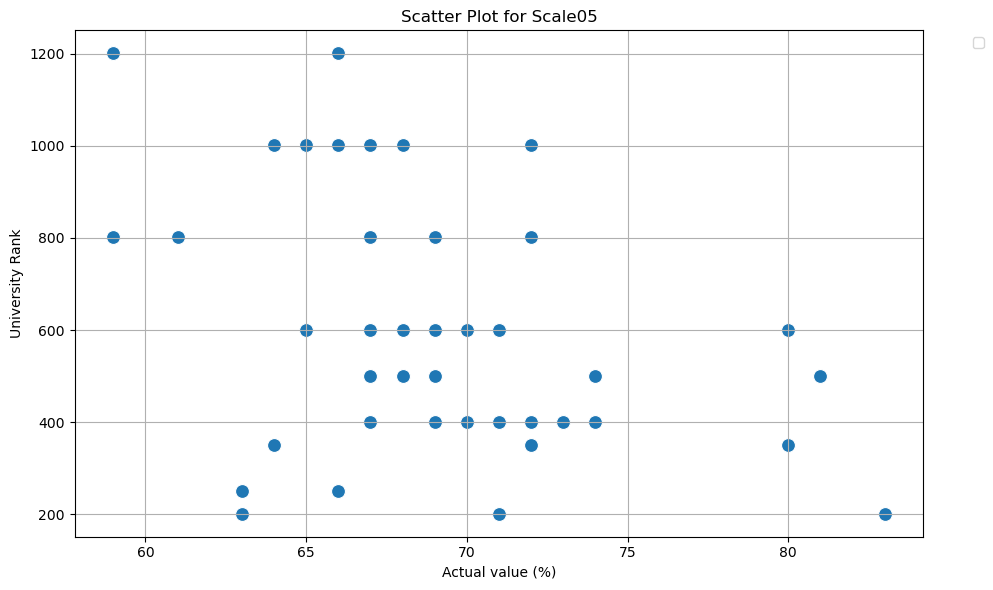

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


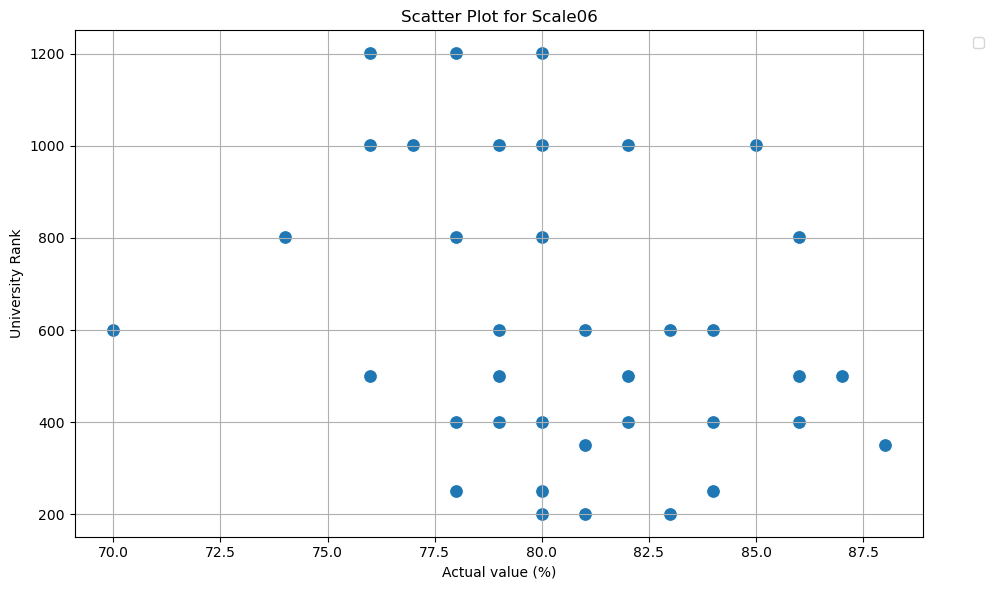

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


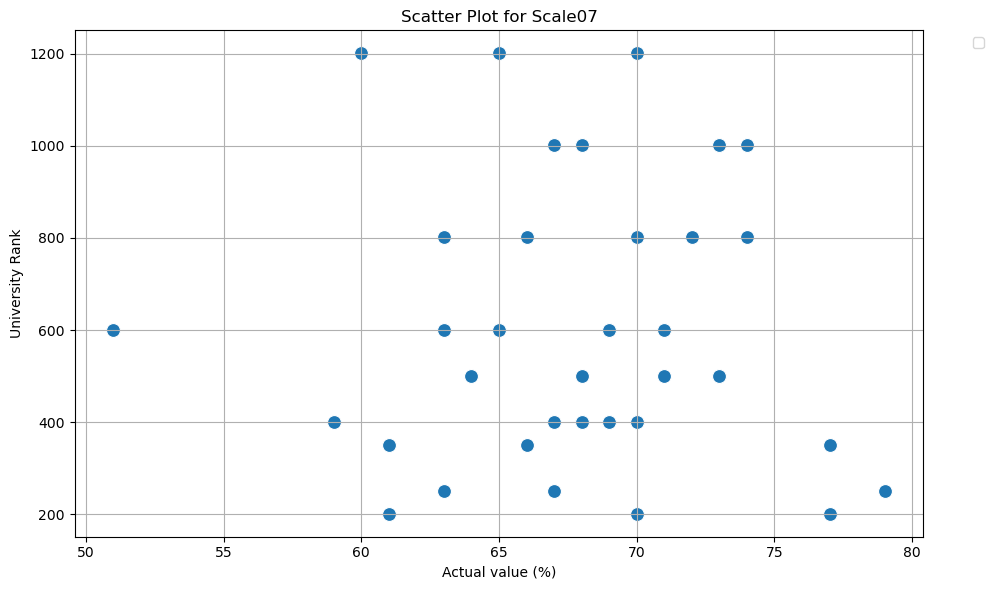

/var/folders/2_/m69mjjkd37b70z95jjfgfgzw0000gn/T/ipykernel_20882/1499473641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


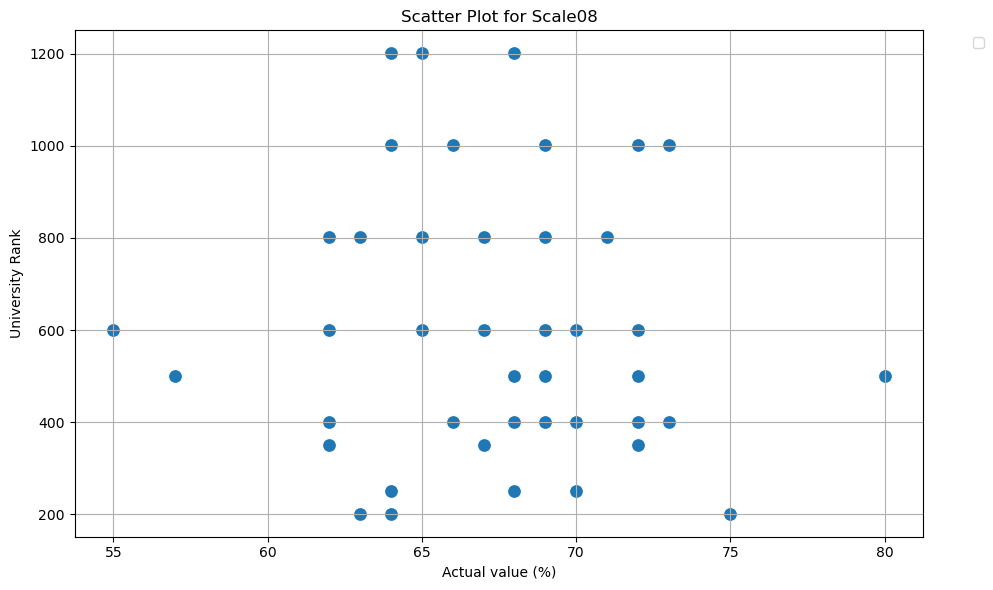

In [31]:
# Plotting each scale question separately
for question in scale_questions:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual value', y='University Rank', data=scale_data[scale_data['Question Number'] == question], palette='viridis', s=100)
    plt.title(f'Scatter Plot for {question}')
    plt.xlabel('Actual value (%)')
    plt.ylabel('University Rank')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Subject Specific Relationships

In [32]:
import os
import pandas as pd



## Collected all subject specific league table files and merge to get merged_file.csv

In [49]:
# # Path to the folder containing the CSV files
# folder_path = 'table'

# # List to store the dataframes
# dataframes = []

# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
        
#         # Read the CSV file while skipping the first 4 rows
#         df = pd.read_csv(file_path, skiprows=4)
#         # Add a column for the filename
        
#         subject = filename.replace('Complete_University_Guide_', '').replace('_2023.csv', '').replace('_', ' ')
#         df['Subject'] = subject

        
#         # Add the dataframe to the list
#         dataframes.append(df)

# # Concatenate all dataframes
# merged_df = pd.concat(dataframes, ignore_index=True)

# # Save the merged dataframe to a new CSV file
# output_file_path = os.path.join(folder_path, 'merged_file.csv')
# merged_df.to_csv(output_file_path, index=False)

# print(f"Merged file saved to {output_file_path}")


## Find unique subjects and Mapped subjects maually from both NSS and league table.

In [51]:
merged_df = pd.read_csv('2023 Subjects Data/merged_file.csv')
merged_df

Rank                                        Institution  \
0        1                              University of Warwick   
1        2  London School of Economics and Political Scien...   
2        3                                  Durham University   
3        4                                University of Leeds   
4        5                                 University of Bath   
...    ...                                                ...   
3874     6                           University of Nottingham   
3875     7                              University of Glasgow   
3876     8     Royal Veterinary College, University of London   
3877     9                         Writtle University College   
3878    10                           Anglia Ruskin University   

      Entry Standards  Student Satisfaction  Research Quality  \
0               163.0                  4.14              3.51   
1               187.0                  3.98              3.56   
2               157.0                  4.10              3.32   
3               165.0                  3.87              3.42   
4               152.0                  3.96              3.49   
...               ...                   ...               ...   
3874            157.0                  4.57              3.25   
3875            216.0                  4.14              3.51   
3876            178.0                  3.93              3.30   
3877            132.0                  4.40               NaN   
3878            117.0                  3.86               NaN   

      Graduate prospects outcomes  Graduate prospects on track  Overall Score  \
0                            86.0                         82.0          100.0   
1                            80.0                         62.0           99.5   
2                            84.0                         90.0           98.9   
3                            82.0                         88.0           98.8   
4                            92.0                         84.0           98.6   
...                           ...                          ...            ...   
3874                         97.0                         94.0           97.0   
3875                         92.0                         95.0           96.5   
3876                         95.0                         88.0           95.5   
3877                          NaN                          NaN           91.8   
3878                          NaN                          NaN           89.4   

                     Subject  
0     Accounting And Finance  
1     Accounting And Finance  
2     Accounting And Finance  
3     Accounting And Finance  
4     Accounting And Finance  
...                      ...  
3874     Veterinary Medicine  
3875     Veterinary Medicine  
3876     Veterinary Medicine  
3877     Veterinary Medicine  
3878     Veterinary Medicine  

[3879 rows x 9 columns]

In [52]:
merged_df['Year']= "2023"

In [53]:
# Find unique items in the 'subject' column
unique_subjects = merged_df['Subject'].unique()

# Print the unique subjects
print("Unique subjects:")
print(unique_subjects)

Unique subjects:
['Accounting And Finance' 'Aeronautical And Aerospace Engineering'
 'African And Middle Eastern Studies' 'Agriculture And Forestry'
 'American Studies' 'Anthropology' 'Archaeology' 'Art And Design'
 'Asian Studies' 'Biological Sciences' 'Biomedical Sciences' 'Building'
 'Business And Management Studies' 'Celtic Studies' 'Chemical Engineering'
 'Chemistry' 'Childhood And Youth Studies' 'Civil Engineering' 'Classics'
 'Communication And Media Studies' 'Complementary Medicine'
 'Computer Science' 'Counselling Psychotherapy And Occupational Therapy'
 'Creative Writing' 'Dentistry' 'Drama Dance And Cinematics' 'Economics'
 'Education' 'Electrical And Electronic Engineering' 'English'
 'Food Science' 'Forensic Science' 'French' 'General Engineering'
 'Geography And Environmental Science' 'Geology' 'German' 'Health Studies'
 'History' 'History Of Art Architecture And Design' 'Iberian Languages'
 'Information Technology And Systems' 'Italian'
 'Land And Property Management' 'L

In [54]:
df2 = pd.read_csv('NSS_taught_all22_sub.csv',encoding='latin1')
df2

UKPRN                            Provider Subject Code  \
0      10007783              University of Aberdeen        CAH01   
1      10007783              University of Aberdeen        CAH01   
2      10007783              University of Aberdeen        CAH01   
3      10007783              University of Aberdeen        CAH01   
4      10007783              University of Aberdeen        CAH01   
...         ...                                 ...          ...   
92290  99999999  Brighton and Sussex Medical School        CAH01   
92291  99999999  Brighton and Sussex Medical School        CAH01   
92292  99999999  Brighton and Sussex Medical School        CAH01   
92293  99999999  Brighton and Sussex Medical School        CAH01   
92294  99999999  Brighton and Sussex Medical School        CAH01   

                      Subject         Level Question Number Answered 1  \
0      Medicine and dentistry  First degree             Q01         1%   
1      Medicine and dentistry  First degree             Q02         1%   
2      Medicine and dentistry  First degree             Q03         2%   
3      Medicine and dentistry  First degree             Q04         2%   
4      Medicine and dentistry  First degree         Scale01         2%   
...                       ...           ...             ...        ...   
92290  Medicine and dentistry  First degree             Q24        13%   
92291  Medicine and dentistry  First degree             Q25        13%   
92292  Medicine and dentistry  First degree         Scale08        10%   
92293  Medicine and dentistry  First degree             Q26         8%   
92294  Medicine and dentistry  First degree             Q27         5%   

      Answered 2 Answered 3 Answered 4 Answered 5  N/A  \
0             4%         4%        52%        39%    0   
1             3%         7%        54%        35%    0   
2             0%         4%        28%        66%    1   
3             4%         6%        38%        50%    0   
4             3%         5%        43%        47%    1   
...          ...        ...        ...        ...  ...   
92290        11%        14%        22%        40%    0   
92291        11%        16%        27%        33%    0   
92292         9%        11%        24%        45%    0   
92293         5%        32%        26%        30%    3   
92294        11%         4%        32%        49%    0   

      Confidence interval - min Actual value Confidence interval - max  \
0                           85%          91%                       95%   
1                           82%          89%                       94%   
2                           88%          94%                       97%   
3                           80%          88%                       93%   
4                           84%          90%                       95%   
...                         ...          ...                       ...   
92290                       52%          63%                       72%   
92291                       49%          60%                       69%   
92292                       59%          70%                       78%   
92293                       45%          55%                       66%   
92294                       71%          81%                       88%   

       Response  Sample Size  
0           138          184  
1           138          184  
2           137          184  
3           138          184  
4           138          184  
...         ...          ...  
92290       104          136  
92291       104          136  
92292       104          136  
92293       101          136  
92294       104          136  

[92295 rows x 17 columns]

In [55]:
# Find unique items in the 'subject' column
unique_subjects2 = df2['Subject'].unique()

# Print the unique subjects
print("Unique subjects:")
print(unique_subjects2)

Unique subjects:
['Medicine and dentistry' 'Subjects allied to medicine'
 'Biological and sport sciences' 'Psychology' 'Physical sciences'
 'Mathematical sciences' 'Engineering and technology' 'Computing'
 'Social sciences' 'Law' 'Business and management'
 'Language and area studies'
 'Historical, philosophical and religious studies'
 'Education and teaching' 'Design, and creative and performing arts'
 'Geography, earth and environmental studies'
 'Agriculture, food and related studies'
 'Media, journalism and communications' 'Veterinary sciences'
 'Architecture, building and planning' 'Combined and general studies']


In [56]:
import numpy as np

In [57]:
df2['Subject'].unique()

array(['Medicine and dentistry', 'Subjects allied to medicine',
       'Biological and sport sciences', 'Psychology', 'Physical sciences',
       'Mathematical sciences', 'Engineering and technology', 'Computing',
       'Social sciences', 'Law', 'Business and management',
       'Language and area studies',
       'Historical, philosophical and religious studies',
       'Education and teaching',
       'Design, and creative and performing arts',
       'Geography, earth and environmental studies',
       'Agriculture, food and related studies',
       'Media, journalism and communications', 'Veterinary sciences',
       'Architecture, building and planning',
       'Combined and general studies'], dtype=object)

## Subject Mapping Dictionary

The `mapping_dict` organizes academic subjects into wider categories. Each key is a general subject area, and the values are specific disciplines within that area. 

In [58]:
mapping_dict = {
    'Medicine and dentistry': ['Medicine', 'Dentistry'],
    'Subjects allied to medicine': ['Biomedical Sciences', 'Health Studies', 'Nursing', 'Pharmacology And Pharmacy', 'Physiotherapy'],
    'Biological and sport sciences': ['Biological Sciences', 'Sports Science'],
    'Psychology': ['Psychology'],
    'Physical sciences': ['Chemistry', 'Physics And Astronomy'],
    'Mathematical sciences': ['Mathematics'],
    'Engineering and technology': ['Aeronautical And Aerospace Engineering', 'Chemical Engineering', 'Civil Engineering', 'Electrical And Electronic Engineering', 'Mechanical Engineering'],
    'Computing': ['Computer Science', 'Information Technology And Systems'],
    'Social sciences': ['Anthropology', 'Economics', 'Politics', 'Social Policy', 'Sociology'],
    'Law': ['Law'],
    'Business and management': ['Accounting And Finance', 'Business And Management Studies', 'Marketing'],
    'Language and area studies': ['African And Middle Eastern Studies', 'American Studies', 'Asian Studies', 'Celtic Studies', 'Classics', 'English', 'French', 'German', 'Iberian Languages', 'Italian', 'Linguistics', 'Russian And East European Languages'],
    'Historical, philosophical and religious studies': ['History', 'Philosophy', 'Theology And Religious Studies'],
    'Education and teaching': ['Education', 'Childhood And Youth Studies'],
    'Design, and creative and performing arts': ['Art And Design', 'Creative Writing', 'Drama Dance And Cinematics', 'History Of Art Architecture And Design', 'Music'],
    'Geography, earth and environmental studies': ['Geography And Environmental Science', 'Geology'],
    'Agriculture, food and related studies': ['Agriculture And Forestry', 'Food Science'],
    'Media, journalism and communications': ['Communication And Media Studies', 'Journalism'],
    'Veterinary sciences': ['Veterinary Medicine'],
    'Architecture, building and planning': ['Architecture', 'Building', 'Land And Property Management', 'Town And Country Planning And Landscape Design'],
    'Combined and general studies': ['General Engineering']
}

In [59]:
import pandas as pd

# Function to map subjects
def map_subject(subject):
    for key, values in mapping_dict.items():
        if subject in values:
            return key
    return subject

# Apply mapping to merged_df
merged_df['Mapped Subject'] = merged_df['Subject'].apply(map_subject)

# Display the result
print(merged_df)


      Rank                                        Institution  \
0        1                              University of Warwick   
1        2  London School of Economics and Political Scien...   
2        3                                  Durham University   
3        4                                University of Leeds   
4        5                                 University of Bath   
...    ...                                                ...   
3874     6                           University of Nottingham   
3875     7                              University of Glasgow   
3876     8     Royal Veterinary College, University of London   
3877     9                         Writtle University College   
3878    10                           Anglia Ruskin University   

      Entry Standards  Student Satisfaction  Research Quality  \
0               163.0                  4.14              3.51   
1               187.0                  3.98              3.56   
2               157.0   

In [60]:
df2['Subject'].unique()

array(['Medicine and dentistry', 'Subjects allied to medicine',
       'Biological and sport sciences', 'Psychology', 'Physical sciences',
       'Mathematical sciences', 'Engineering and technology', 'Computing',
       'Social sciences', 'Law', 'Business and management',
       'Language and area studies',
       'Historical, philosophical and religious studies',
       'Education and teaching',
       'Design, and creative and performing arts',
       'Geography, earth and environmental studies',
       'Agriculture, food and related studies',
       'Media, journalism and communications', 'Veterinary sciences',
       'Architecture, building and planning',
       'Combined and general studies'], dtype=object)

In [61]:
merged_df['Mapped Subject'].unique()

array(['Business and management', 'Engineering and technology',
       'Language and area studies',
       'Agriculture, food and related studies', 'Social sciences',
       'Archaeology', 'Design, and creative and performing arts',
       'Biological and sport sciences', 'Subjects allied to medicine',
       'Architecture, building and planning', 'Physical sciences',
       'Education and teaching', 'Media, journalism and communications',
       'Complementary Medicine', 'Computing',
       'Counselling Psychotherapy And Occupational Therapy',
       'Medicine and dentistry', 'Forensic Science',
       'Combined and general studies',
       'Geography, earth and environmental studies',
       'Historical, philosophical and religious studies', 'Law',
       'Manufacturing And Production Engineering', 'Materials Technology',
       'Mathematical sciences', 'Medical Technology And Bioengineering',
       'Optometry Ophthalmics And Orthoptics', 'Paramedic Science',
       'Psychology', 'S

## Find common Subjects and merge both df

In [62]:
df2_subjects_set = set(df2['Subject'])
merged_subjects_set = set(merged_df['Mapped Subject'])

# Find common elements
common_elements = df2_subjects_set.intersection(merged_subjects_set)

# Display the common elements
print("Common Elements:")
print(common_elements)

Common Elements:
{'Biological and sport sciences', 'Engineering and technology', 'Social sciences', 'Architecture, building and planning', 'Subjects allied to medicine', 'Veterinary sciences', 'Historical, philosophical and religious studies', 'Mathematical sciences', 'Computing', 'Language and area studies', 'Medicine and dentistry', 'Geography, earth and environmental studies', 'Education and teaching', 'Media, journalism and communications', 'Combined and general studies', 'Law', 'Psychology', 'Business and management', 'Design, and creative and performing arts', 'Agriculture, food and related studies', 'Physical sciences'}


In [63]:
list(df2.columns)


['UKPRN',
 'Provider',
 'Subject Code',
 'Subject',
 'Level',
 'Question Number',
 'Answered 1',
 'Answered 2',
 'Answered 3',
 'Answered 4',
 'Answered 5',
 'N/A',
 'Confidence interval - min',
 'Actual value',
 'Confidence interval - max',
 'Response',
 'Sample Size']

In [64]:
list(merged_df.columns)


['Rank',
 'Institution',
 'Entry Standards',
 'Student Satisfaction',
 'Research Quality',
 'Graduate prospects outcomes',
 'Graduate prospects on track',
 'Overall Score',
 'Subject',
 'Year',
 'Mapped Subject']

In [65]:
df2_common = df2[df2['Subject'].isin(common_elements)]
merged_common = merged_df[merged_df['Mapped Subject'].isin(common_elements)]

# Perform inner join on 'Provider'/'Institution'
common_df = pd.merge(df2_common, merged_common, left_on=['Provider', 'Subject'], right_on=['Institution', 'Mapped Subject'], how='inner')
# Display or work with the resulting dataframe common_df
print(common_df.head())

      UKPRN                Provider Subject Code               Subject_x  \
0  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
1  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
2  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
3  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
4  10007783  University of Aberdeen        CAH01  Medicine and dentistry   

          Level Question Number Answered 1 Answered 2 Answered 3 Answered 4  \
0  First degree             Q01         1%         4%         4%        52%   
1  First degree             Q02         1%         3%         7%        54%   
2  First degree             Q03         2%         0%         4%        28%   
3  First degree             Q04         2%         4%         6%        38%   
4  First degree         Scale01         2%         3%         5%        43%   

   ...             Institution  Entry Standards Student Satisfaction

In [66]:
common_df

UKPRN                            Provider Subject Code  \
0      10007783              University of Aberdeen        CAH01   
1      10007783              University of Aberdeen        CAH01   
2      10007783              University of Aberdeen        CAH01   
3      10007783              University of Aberdeen        CAH01   
4      10007783              University of Aberdeen        CAH01   
...         ...                                 ...          ...   
73005  99999999  Brighton and Sussex Medical School        CAH01   
73006  99999999  Brighton and Sussex Medical School        CAH01   
73007  99999999  Brighton and Sussex Medical School        CAH01   
73008  99999999  Brighton and Sussex Medical School        CAH01   
73009  99999999  Brighton and Sussex Medical School        CAH01   

                    Subject_x         Level Question Number Answered 1  \
0      Medicine and dentistry  First degree             Q01         1%   
1      Medicine and dentistry  First degree             Q02         1%   
2      Medicine and dentistry  First degree             Q03         2%   
3      Medicine and dentistry  First degree             Q04         2%   
4      Medicine and dentistry  First degree         Scale01         2%   
...                       ...           ...             ...        ...   
73005  Medicine and dentistry  First degree             Q24        13%   
73006  Medicine and dentistry  First degree             Q25        13%   
73007  Medicine and dentistry  First degree         Scale08        10%   
73008  Medicine and dentistry  First degree             Q26         8%   
73009  Medicine and dentistry  First degree             Q27         5%   

      Answered 2 Answered 3 Answered 4  ...  \
0             4%         4%        52%  ...   
1             3%         7%        54%  ...   
2             0%         4%        28%  ...   
3             4%         6%        38%  ...   
4             3%         5%        43%  ...   
...          ...        ...        ...  ...   
73005        11%        14%        22%  ...   
73006        11%        16%        27%  ...   
73007         9%        11%        24%  ...   
73008         5%        32%        26%  ...   
73009        11%         4%        32%  ...   

                              Institution  Entry Standards  \
0                  University of Aberdeen            239.0   
1                  University of Aberdeen            239.0   
2                  University of Aberdeen            239.0   
3                  University of Aberdeen            239.0   
4                  University of Aberdeen            239.0   
...                                   ...              ...   
73005  Brighton and Sussex Medical School            168.0   
73006  Brighton and Sussex Medical School            168.0   
73007  Brighton and Sussex Medical School            168.0   
73008  Brighton and Sussex Medical School            168.0   
73009  Brighton and Sussex Medical School            168.0   

      Student Satisfaction Research Quality Graduate prospects outcomes  \
0                     4.10             2.92                       100.0   
1                     4.10             2.92                       100.0   
2                     4.10             2.92                       100.0   
3                     4.10             2.92                       100.0   
4                     4.10             2.92                       100.0   
...                    ...              ...                         ...   
73005                 4.45             3.14                       100.0   
73006                 4.45             3.14                       100.0   
73007                 4.45             3.14                       100.0   
73008                 4.45             3.14                       100.0   
73009                 4.45             3.14                       100.0   

       Graduate prospects on track  Overall Score  Subject_y  Year  \
0                      

# Create seperate df for seperate subjects

In [67]:

# Create separate dataframes for each 'Mapped Subject'
mapped_subjects = merged_common['Mapped Subject'].unique()

subject_dfs = {}
for subject in mapped_subjects:
    # Filter rows in df2_common and merged_common for the current subject
    df2_subject = df2_common[df2_common['Subject'] == subject]
    merged_subject = merged_common[merged_common['Mapped Subject'] == subject]
    
    # Perform inner join on 'Provider'/'Institution'
    merged_subject_df = pd.merge(df2_subject, merged_subject, left_on='Provider', right_on='Institution', how='inner')
    
    # Store the dataframe in a dictionary
    subject_dfs[subject] = merged_subject_df

# Access individual dataframes by subject name
for subject, df in subject_dfs.items():
    print(f"Dataframe for '{subject}':")
    print(df.head())
    print("\n")

Dataframe for 'Business and management':
      UKPRN                Provider Subject Code                Subject_x  \
0  10007783  University of Aberdeen        CAH17  Business and management   
1  10007783  University of Aberdeen        CAH17  Business and management   
2  10007783  University of Aberdeen        CAH17  Business and management   
3  10007783  University of Aberdeen        CAH17  Business and management   
4  10007783  University of Aberdeen        CAH17  Business and management   

          Level Question Number Answered 1 Answered 2 Answered 3 Answered 4  \
0  First degree             Q01         1%         3%         8%        52%   
1  First degree             Q01         1%         3%         8%        52%   
2  First degree             Q02         2%         5%        16%        45%   
3  First degree             Q02         2%         5%        16%        45%   
4  First degree             Q03         2%         3%        15%        48%   

   ...             In

In [68]:
subject_dfs['Business and management']

UKPRN                 Provider Subject Code                Subject_x  \
0     10007783   University of Aberdeen        CAH17  Business and management   
1     10007783   University of Aberdeen        CAH17  Business and management   
2     10007783   University of Aberdeen        CAH17  Business and management   
3     10007783   University of Aberdeen        CAH17  Business and management   
4     10007783   University of Aberdeen        CAH17  Business and management   
...        ...                      ...          ...                      ...   
7310  10007713  York St John University        CAH17  Business and management   
7311  10007713  York St John University        CAH17  Business and management   
7312  10007713  York St John University        CAH17  Business and management   
7313  10007713  York St John University        CAH17  Business and management   
7314  10007713  York St John University        CAH17  Business and management   

             Level Question Number Answered 1 Answered 2 Answered 3  \
0     First degree             Q01         1%         3%         8%   
1     First degree             Q01         1%         3%         8%   
2     First degree             Q02         2%         5%        16%   
3     First degree             Q02         2%         5%        16%   
4     First degree             Q03         2%         3%        15%   
...            ...             ...        ...        ...        ...   
7310  First degree             Q26         2%         4%        32%   
7311  First degree             Q26         2%         4%        32%   
7312  First degree             Q27         5%         6%         5%   
7313  First degree             Q27         5%         6%         5%   
7314  First degree             Q27         5%         6%         5%   

     Answered 4  ...              Institution  Entry Standards  \
0           52%  ...   University of Aberdeen            182.0   
1           52%  ...   University of Aberdeen            175.0   
2           45%  ...   University of Aberdeen            182.0   
3           45%  ...   University of Aberdeen            175.0   
4           48%  ...   University of Aberdeen            182.0   
...         ...  ...                      ...              ...   
7310        37%  ...  York St John University            101.0   
7311        37%  ...  York St John University             99.0   
7312        47%  ...  York St John University            100.0   
7313        47%  ...  York St John University            101.0   
7314        47%  ...  York St John University             99.0   

     Student Satisfaction Research Quality Graduate prospects outcomes  \
0                    4.06             2.96                        64.0   
1                    3.71             2.96                        68.0   
2                    4.06             2.96                        64.0   
3                    3.71             2.96                        68.0   
4                    4.06             2.96                        64.0   
...                   ...              ...                         ...   
7310                 3.66             2.23                        59.0   
7311                 3.66             2.23                         NaN   
7312                 3.67             2.23                         NaN   
7313                 3.66             2.23                        59.0   
7314                 3.66             2.23                         NaN   

      Graduate prospects on track  Overall Score  \
0                            78.0           90.9   
1                            71.0           84.8   
2                            78.0           90.9   
3                            71.0           84.8   
4                            78.0           90.9   
...                           ...            ...   
7310                         73.0           75.2   
7311                          NaN           71.7   
7312                          NaN

In [69]:
import re
def extract_numeric_percentage(value):
    # Extract numeric part from percentage string
    return float(re.findall(r'\d+\.\d+|\d+', value)[0])

for key in subject_dfs:
    subject_dfs[key]['Actual value'] = subject_dfs[key]['Actual value'].apply(extract_numeric_percentage)
    subject_dfs[key]['Confidence interval - min'] = subject_dfs[key]['Confidence interval - min'].apply(extract_numeric_percentage)
    subject_dfs[key]['Confidence interval - max'] = subject_dfs[key]['Confidence interval - max'].apply(extract_numeric_percentage)
    

# Correlation analysis 
## for 'Business and management'

In [70]:
import pandas as pd
import re
merged_df2 = subject_dfs['Business and management']

correlations = {}
questions = merged_df2['Question Number'].unique()

for question in questions:
    df_question = merged_df2[merged_df2['Question Number'] == question]
    correlation = df_question['Actual value'].corr(df_question['Rank'])
    correlations[question] = correlation

# Convert correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Question Number', 'Correlation'])

# Sort correlations by absolute correlation value
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)

print(correlations_df)

   Question Number  Correlation  Abs Correlation
11             Q10     0.413112         0.413112
12             Q11     0.330328         0.330328
13         Scale03     0.300483         0.300483
19             Q16    -0.219472         0.219472
16             Q14     0.194685         0.194685
10             Q09     0.193710         0.193710
31             Q25     0.188602         0.188602
22             Q18    -0.184235         0.184235
25         Scale06    -0.156436         0.156436
21         Scale05    -0.149014         0.149014
30             Q24     0.147824         0.147824
26             Q21     0.144324         0.144324
14             Q12    -0.140534         0.140534
15             Q13     0.134414         0.134414
24             Q20    -0.129188         0.129188
29             Q23    -0.125882         0.125882
2              Q03    -0.125566         0.125566
32         Scale08     0.123181         0.123181
9              Q08     0.122837         0.122837
23             Q19  

In [71]:

# Filter rows containing Scale data (assuming Scale01 to Scale08 are in 'Question Number')
scale_questions = ['Scale01', 'Scale02', 'Scale03', 'Scale04', 'Scale05', 'Scale06', 'Scale07', 'Scale08']
scale_data = merged_df2[merged_df2['Question Number'].isin(scale_questions)]

# Convert 'Actual value' column to numeric
#scale_data['Actual value'] = scale_data['Actual value'].apply(lambda x: float(x.strip('%')))

# Calculate correlations between each scale and 'University Rank'
correlations = {}

for scale in scale_questions:
    df_scale = scale_data[scale_data['Question Number'] == scale]
    correlation = df_scale['Actual value'].corr(df_scale['Rank'])
    correlations[scale] = correlation

# Convert correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Scale', 'Correlation'])

# Sort correlations by absolute correlation value (optional)
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)

print(correlations_df)

     Scale  Correlation  Abs Correlation
2  Scale03     0.300483         0.300483
5  Scale06    -0.156436         0.156436
4  Scale05    -0.149014         0.149014
7  Scale08     0.123181         0.123181
6  Scale07     0.114566         0.114566
3  Scale04     0.093408         0.093408
1  Scale02    -0.028978         0.028978
0  Scale01    -0.024513         0.024513


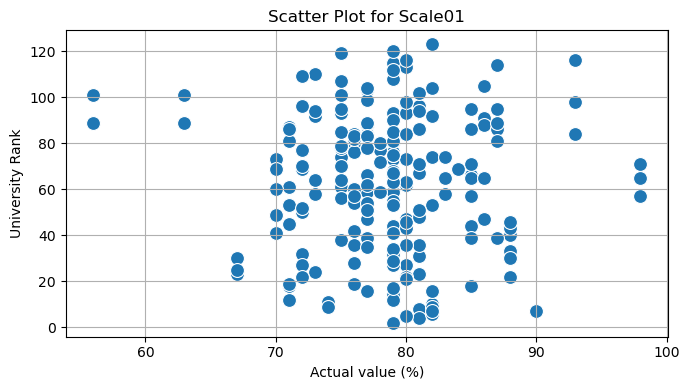

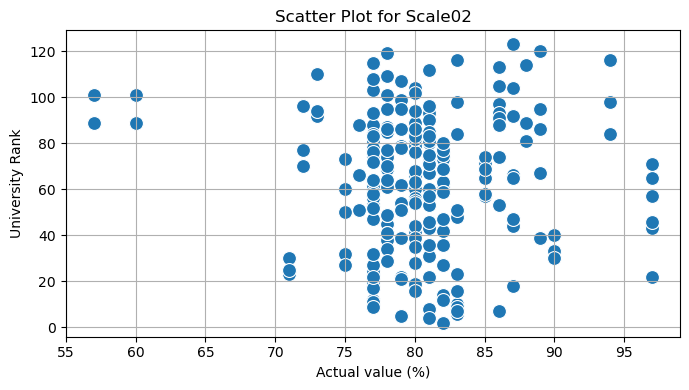

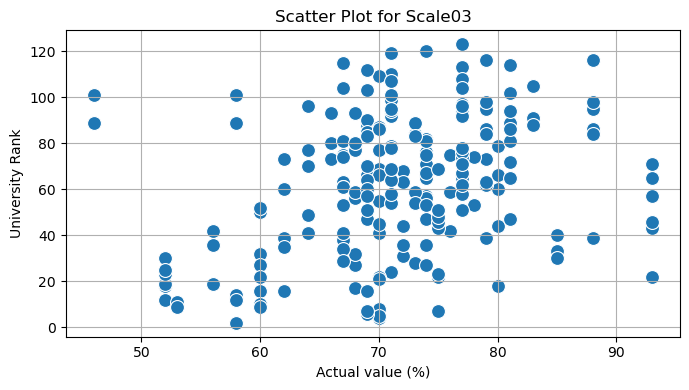

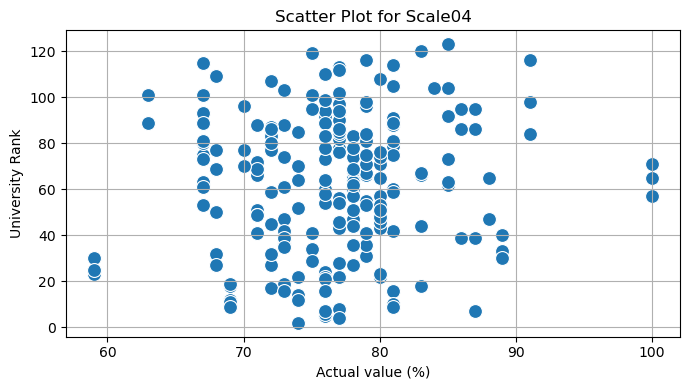

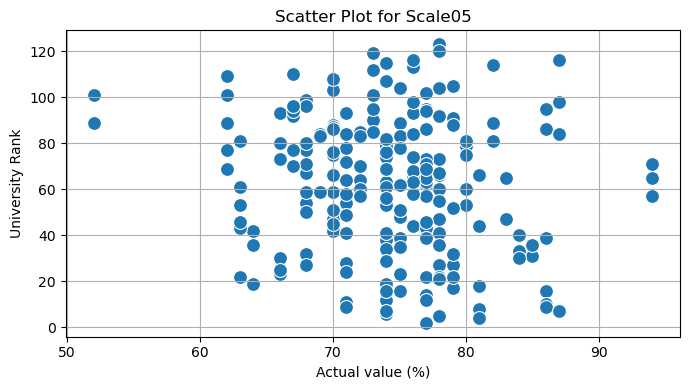

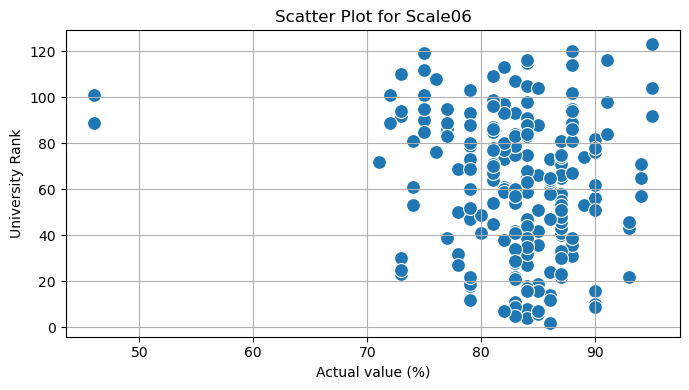

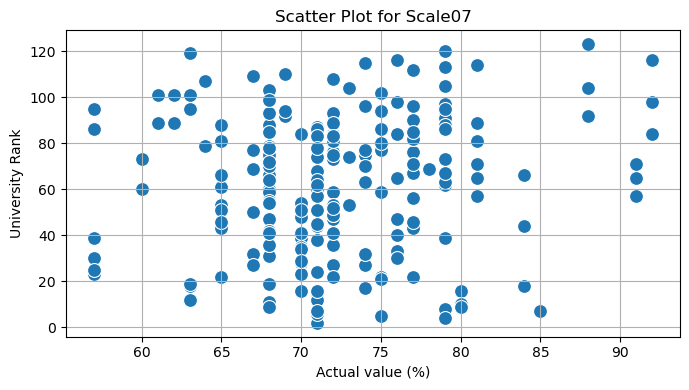

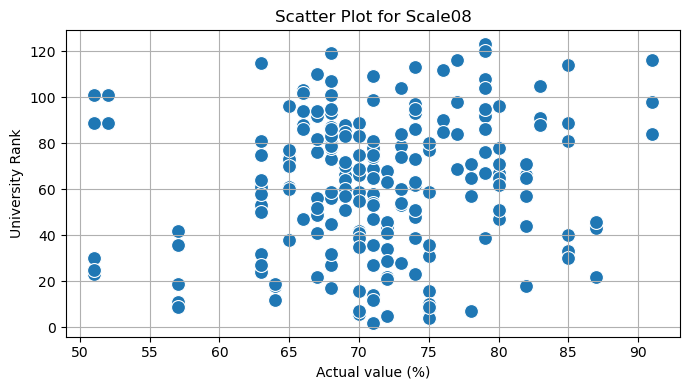

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting each scale question separately
for question in scale_questions:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x='Actual value', y='Rank', data=scale_data[scale_data['Question Number'] == question], s=100)
    plt.title(f'Scatter Plot for {question}')
    plt.xlabel('Actual value (%)')
    plt.ylabel('University Rank')
    plt.grid(True)
    plt.tight_layout()
plt.show()

In [73]:
merged_df2.head()

UKPRN                Provider Subject Code                Subject_x  \
0  10007783  University of Aberdeen        CAH17  Business and management   
1  10007783  University of Aberdeen        CAH17  Business and management   
2  10007783  University of Aberdeen        CAH17  Business and management   
3  10007783  University of Aberdeen        CAH17  Business and management   
4  10007783  University of Aberdeen        CAH17  Business and management   

          Level Question Number Answered 1 Answered 2 Answered 3 Answered 4  \
0  First degree             Q01         1%         3%         8%        52%   
1  First degree             Q01         1%         3%         8%        52%   
2  First degree             Q02         2%         5%        16%        45%   
3  First degree             Q02         2%         5%        16%        45%   
4  First degree             Q03         2%         3%        15%        48%   

   ...             Institution  Entry Standards  Student Satisfaction  \
0  ...  University of Aberdeen            182.0                  4.06   
1  ...  University of Aberdeen            175.0                  3.71   
2  ...  University of Aberdeen            182.0                  4.06   
3  ...  University of Aberdeen            175.0                  3.71   
4  ...  University of Aberdeen            182.0                  4.06   

   Research Quality  Graduate prospects outcomes  Graduate prospects on track  \
0              2.96                         64.0                         78.0   
1              2.96                         68.0                         71.0   
2              2.96                         64.0                         78.0   
3              2.96                         68.0                         71.0   
4              2.96                         64.0                         78.0   

   Overall Score                        Subject_y  Year  \
0           90.9           Accounting And Finance  2023   
1           84.8  Business And Management Studies  2023   
2           90.9           Accounting And Finance  2023   
3           84.8  Business And Management Studies  2023   
4           90.9           Accounting And Finance  2023   

            Mapped Subject  
0  Business and management  
1  Business and management  
2  Business and management  
3  Business and management  
4  Business and management  

[5 rows x 28 columns]

# Correlation analysis
## for Accounting And Finance(subject) in Business and management(mapped subject)

In [74]:
import pandas as pd
import re
merged_df2 = subject_dfs['Business and management']
merged_df2 = merged_df2[merged_df2['Subject_y']=='Accounting And Finance']


merged_df2

UKPRN                 Provider Subject Code                Subject_x  \
0     10007783   University of Aberdeen        CAH17  Business and management   
2     10007783   University of Aberdeen        CAH17  Business and management   
4     10007783   University of Aberdeen        CAH17  Business and management   
6     10007783   University of Aberdeen        CAH17  Business and management   
8     10007783   University of Aberdeen        CAH17  Business and management   
...        ...                      ...          ...                      ...   
7300  10007713  York St John University        CAH17  Business and management   
7303  10007713  York St John University        CAH17  Business and management   
7306  10007713  York St John University        CAH17  Business and management   
7309  10007713  York St John University        CAH17  Business and management   
7312  10007713  York St John University        CAH17  Business and management   

             Level Question Number Answered 1 Answered 2 Answered 3  \
0     First degree             Q01         1%         3%         8%   
2     First degree             Q02         2%         5%        16%   
4     First degree             Q03         2%         3%        15%   
6     First degree             Q04         2%         5%        13%   
8     First degree         Scale01         2%         4%        13%   
...            ...             ...        ...        ...        ...   
7300  First degree             Q24         5%         6%        15%   
7303  First degree             Q25        11%        12%        30%   
7306  First degree         Scale08         6%         8%        20%   
7309  First degree             Q26         2%         4%        32%   
7312  First degree             Q27         5%         6%         5%   

     Answered 4  ...              Institution  Entry Standards  \
0           52%  ...   University of Aberdeen            182.0   
2           45%  ...   University of Aberdeen            182.0   
4           48%  ...   University of Aberdeen            182.0   
6           43%  ...   University of Aberdeen            182.0   
8           47%  ...   University of Aberdeen            182.0   
...         ...  ...                      ...              ...   
7300        44%  ...  York St John University            100.0   
7303        30%  ...  York St John University            100.0   
7306        37%  ...  York St John University            100.0   
7309        37%  ...  York St John University            100.0   
7312        47%  ...  York St John University            100.0   

      Student Satisfaction  Research Quality  Graduate prospects outcomes  \
0                     4.06              2.96                         64.0   
2                     4.06              2.96                         64.0   
4                     4.06              2.96                         64.0   
6                     4.06              2.96                         64.0   
8                     4.06              2.96                         64.0   
...                    ...               ...                          ...   
7300                  3.67              2.23                          NaN   
7303                  3.67              2.23                          NaN   
7306                  3.67              2.23                          NaN   
7309                  3.67              2.23                          NaN   
7312                  3.67              2.23                          NaN   

      Graduate prospects on track  Overall Score               Subject_y  \
0                            78.0           90.9  Accounting And Finance   
2                            78.0           90.9  Accounting And Finance   
4                            78.0           90.9  Accounting And Finance   
6                            78.0           90.9  Accounting And Finance   
8                            78.0           90.9  Accounting And Finance   
...      

Correlation analysis between `'Actual value'` and `'University Rank'` for each question in the dataset. It computes
these correlations and stores them in a DataFrame, which is then sorted by the absolute value of the correlation to highlight the strongest relationships.

In [75]:
# Function to extract numeric value from percentage string

# Convert 'Actual value' column to numeric

# Calculate correlations between 'Actual value' and 'University Rank' for each question
correlations = {}
questions = merged_df2['Question Number'].unique()

for question in questions:
    df_question = merged_df2[merged_df2['Question Number'] == question]
    correlation = df_question['Actual value'].corr(df_question['Rank'])
    correlations[question] = correlation

# Convert correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Question Number', 'Correlation'])

# Sort correlations by absolute correlation value (optional)
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)

print(correlations_df)

   Question Number  Correlation  Abs Correlation
11             Q10     0.484875         0.484875
12             Q11     0.425036         0.425036
13         Scale03     0.357744         0.357744
16             Q14     0.280998         0.280998
19             Q16    -0.252455         0.252455
10             Q09     0.243018         0.243018
26             Q21     0.223773         0.223773
31             Q25     0.199690         0.199690
28         Scale07     0.178402         0.178402
30             Q24     0.173019         0.173019
25         Scale06    -0.172107         0.172107
29             Q23    -0.170141         0.170141
23             Q19    -0.169964         0.169964
15             Q13     0.168509         0.168509
24             Q20    -0.162927         0.162927
22             Q18    -0.159286         0.159286
14             Q12    -0.152021         0.152021
17         Scale04     0.143517         0.143517
21         Scale05    -0.136416         0.136416
9              Q08  

Correlation analysis between `'Actual value'` and `'University Rank'` for each scale in the dataset.

In [76]:

# Filter rows containing Scale data (assuming Scale01 to Scale08 are in 'Question Number')
scale_questions = ['Scale01', 'Scale02', 'Scale03', 'Scale04', 'Scale05', 'Scale06', 'Scale07', 'Scale08']
scale_data = merged_df2[merged_df2['Question Number'].isin(scale_questions)]

# Convert 'Actual value' column to numeric
#scale_data['Actual value'] = scale_data['Actual value'].apply(lambda x: float(x.strip('%')))

# Calculate correlations between each scale and 'University Rank'
correlations = {}

for scale in scale_questions:
    df_scale = scale_data[scale_data['Question Number'] == scale]
    correlation = df_scale['Actual value'].corr(df_scale['Rank'])
    correlations[scale] = correlation

# Convert correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Scale', 'Correlation'])

# Sort correlations by absolute correlation value (optional)
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)

print(correlations_df)

     Scale  Correlation  Abs Correlation
2  Scale03     0.357744         0.357744
6  Scale07     0.178402         0.178402
5  Scale06    -0.172107         0.172107
3  Scale04     0.143517         0.143517
4  Scale05    -0.136416         0.136416
7  Scale08     0.129636         0.129636
1  Scale02    -0.022599         0.022599
0  Scale01    -0.005262         0.005262


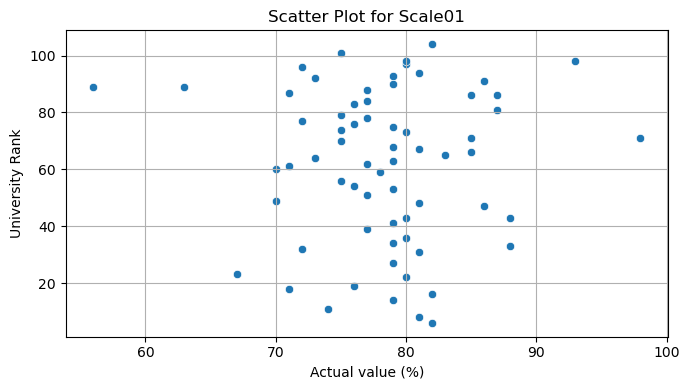

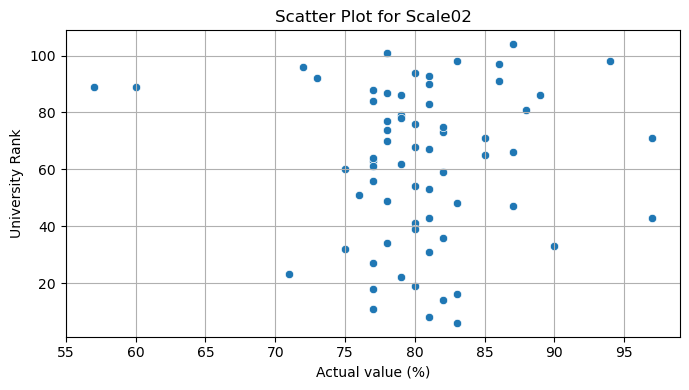

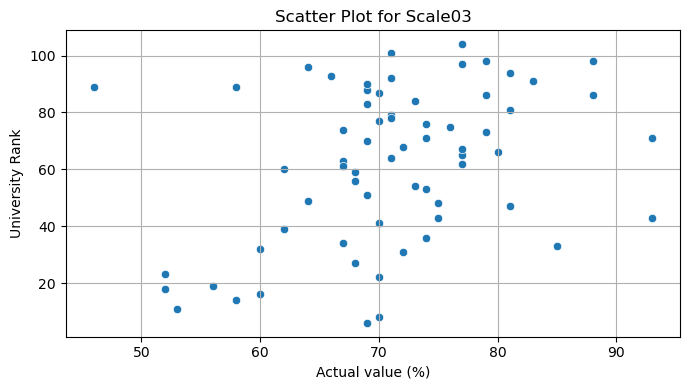

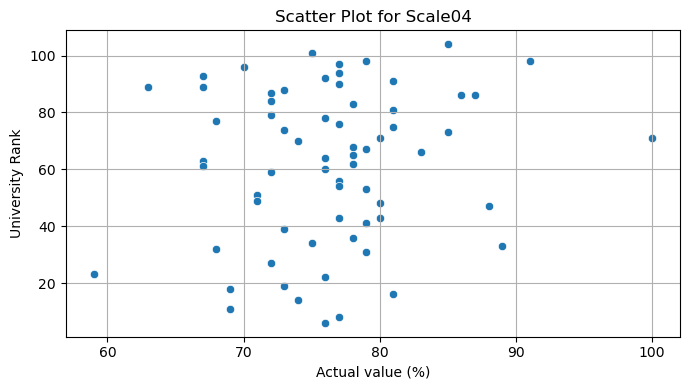

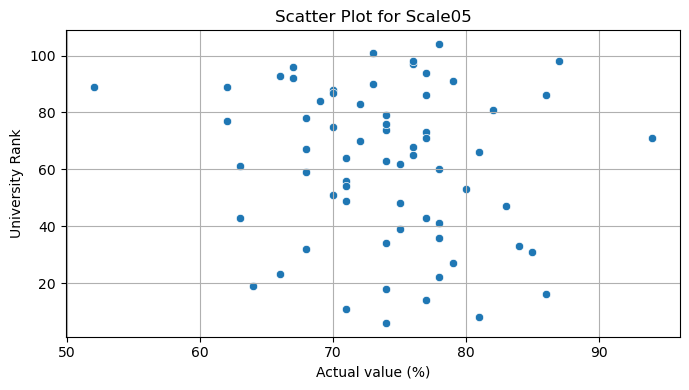

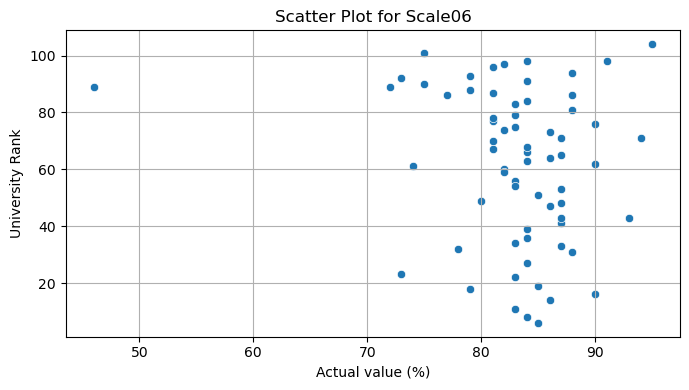

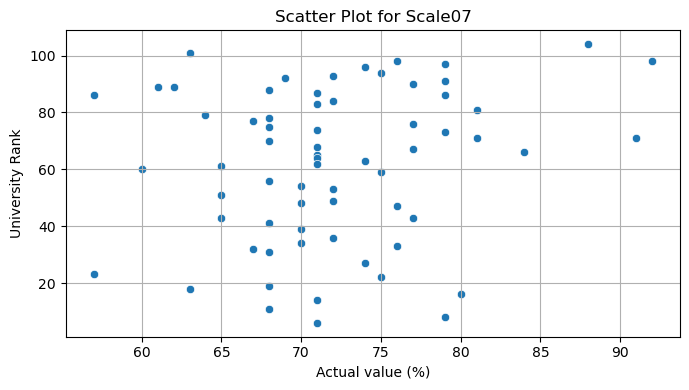

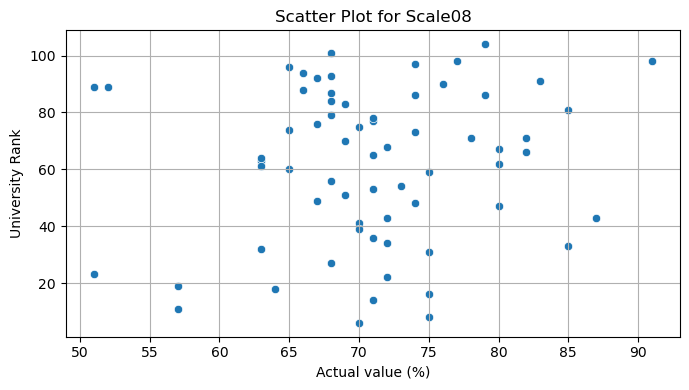

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting each scale question separately
for question in scale_questions:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x='Actual value', y='Rank', data=scale_data[scale_data['Question Number'] == question])
    plt.title(f'Scatter Plot for {question}')
    plt.xlabel('Actual value (%)')
    plt.ylabel('University Rank')
    plt.grid(True)
    plt.tight_layout()
plt.show()

## ALL SUBJECT CORRELATION

In [78]:
for key in subject_dfs:
    scale_data = subject_dfs[key][subject_dfs[key]['Question Number'].isin(scale_questions)]
    #scale_data['Actual value'] = scale_data['Actual value'].apply(lambda x: float(x.strip('%')))
    correlations = {}

    for scale in scale_questions:
        df_scale = scale_data[scale_data['Question Number'] == scale]
        correlation = df_scale['Actual value'].corr(df_scale['Rank'])
        correlations[scale] = correlation
    # Convert correlations dictionary to a DataFrame for better visualization
    correlations_df = pd.DataFrame(list(correlations.items()), columns=['Scale', 'Correlation'])
    # Sort correlations by absolute correlation value (optional)
    correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
    correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)
    print(key)
    print(correlations_df[:4])

Business and management
     Scale  Correlation  Abs Correlation
2  Scale03     0.300483         0.300483
5  Scale06    -0.156436         0.156436
4  Scale05    -0.149014         0.149014
7  Scale08     0.123181         0.123181
Engineering and technology
     Scale  Correlation  Abs Correlation
2  Scale03     0.352200         0.352200
6  Scale07    -0.227624         0.227624
5  Scale06    -0.192898         0.192898
7  Scale08     0.171894         0.171894
Language and area studies
     Scale  Correlation  Abs Correlation
5  Scale06    -0.352995         0.352995
2  Scale03     0.248841         0.248841
3  Scale04     0.215894         0.215894
7  Scale08     0.139127         0.139127
Agriculture, food and related studies
     Scale  Correlation  Abs Correlation
5  Scale06     0.315648         0.315648
1  Scale02     0.264602         0.264602
3  Scale04     0.253007         0.253007
4  Scale05    -0.192621         0.192621
Social sciences
     Scale  Correlation  Abs Correlation
2  Scale

In [79]:
for key in subject_dfs:
    correlations = {}
    questions = subject_dfs[key]['Question Number'].unique()
    for question in questions:
        df_question = subject_dfs[key][subject_dfs[key]['Question Number'] == question]
        correlation = df_question['Actual value'].corr(df_question['Rank'])
        correlations[question] = correlation
    correlations_df = pd.DataFrame(list(correlations.items()), columns=['Question Number', 'Correlation'])
    correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
    correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)
    print(key)
    print(correlations_df[:4])

Business and management
   Question Number  Correlation  Abs Correlation
11             Q10     0.413112         0.413112
12             Q11     0.330328         0.330328
13         Scale03     0.300483         0.300483
19             Q16    -0.219472         0.219472
Engineering and technology
   Question Number  Correlation  Abs Correlation
11             Q10     0.395907         0.395907
13         Scale03     0.352200         0.352200
12             Q11     0.332130         0.332130
2              Q03    -0.330759         0.330759
Language and area studies
   Question Number  Correlation  Abs Correlation
23             Q19    -0.374058         0.374058
25         Scale06    -0.352995         0.352995
19             Q16    -0.347894         0.347894
24             Q20    -0.293665         0.293665
Agriculture, food and related studies
   Question Number  Correlation  Abs Correlation
15             Q13     0.425390         0.425390
24             Q20     0.392963         0.392963
7  

In [80]:
list(subject_dfs['Business and management'].columns)

['UKPRN',
 'Provider',
 'Subject Code',
 'Subject_x',
 'Level',
 'Question Number',
 'Answered 1',
 'Answered 2',
 'Answered 3',
 'Answered 4',
 'Answered 5',
 'N/A',
 'Confidence interval - min',
 'Actual value',
 'Confidence interval - max',
 'Response',
 'Sample Size',
 'Rank',
 'Institution',
 'Entry Standards',
 'Student Satisfaction',
 'Research Quality',
 'Graduate prospects outcomes',
 'Graduate prospects on track',
 'Overall Score',
 'Subject_y',
 'Year',
 'Mapped Subject']

## APPLY LINEAR REGRESSION (ACTUAL VALUE VS RANK)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
samplemodel = LinearRegression()

Business and management


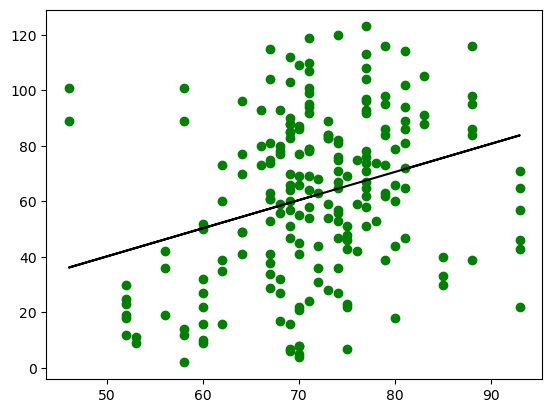

Engineering and technology


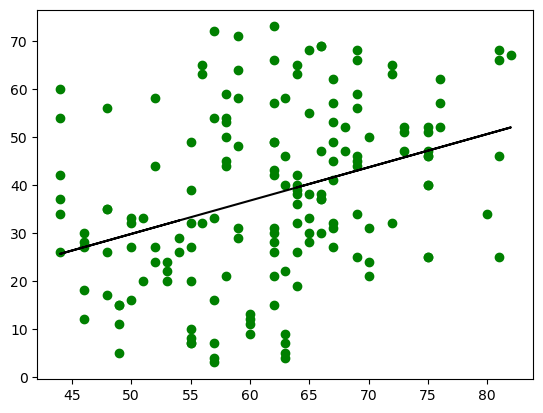

Language and area studies


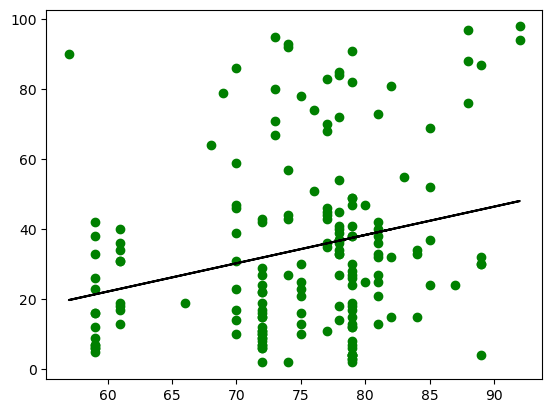

Agriculture, food and related studies


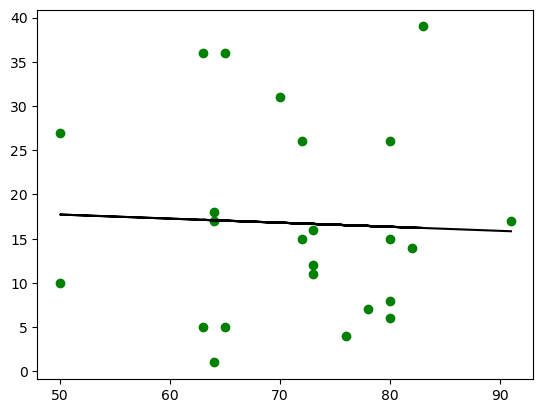

Social sciences


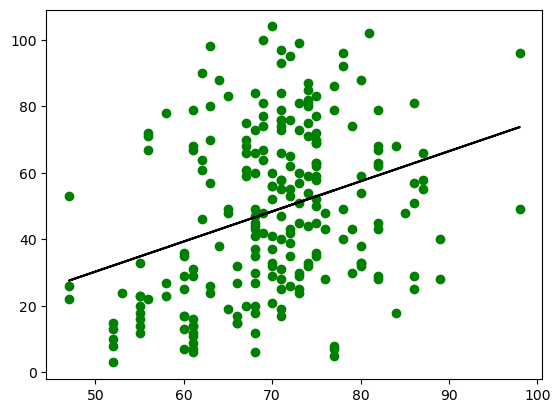

Design, and creative and performing arts


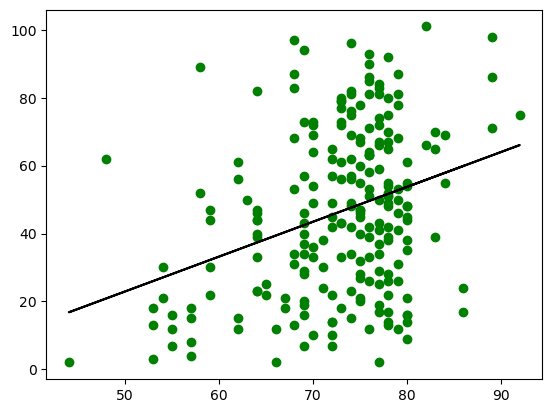

Biological and sport sciences


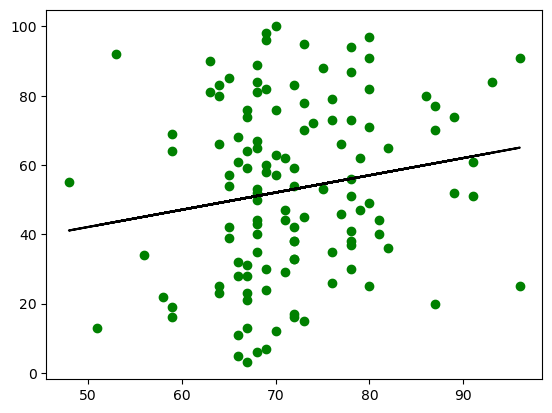

Subjects allied to medicine


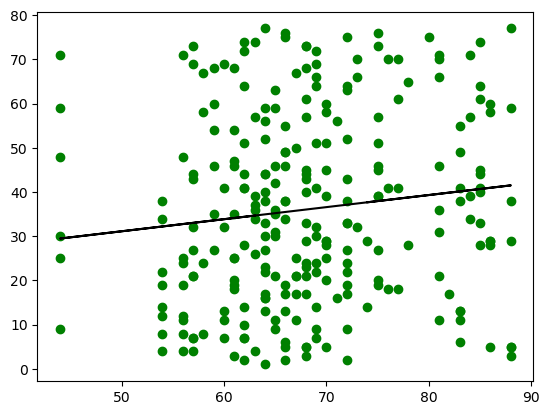

Architecture, building and planning


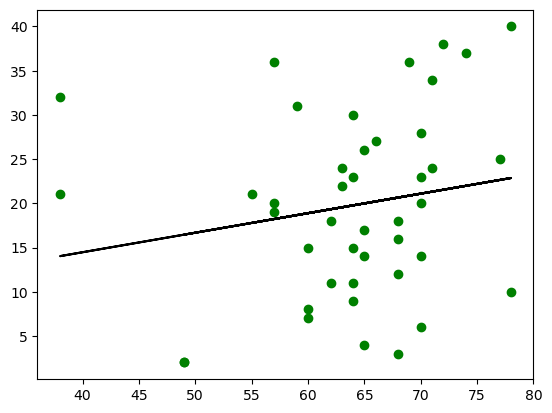

Physical sciences


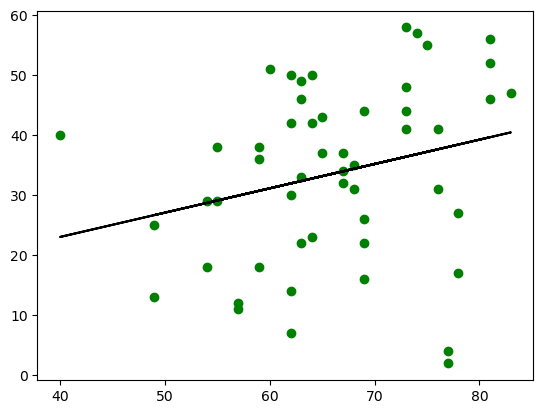

Education and teaching


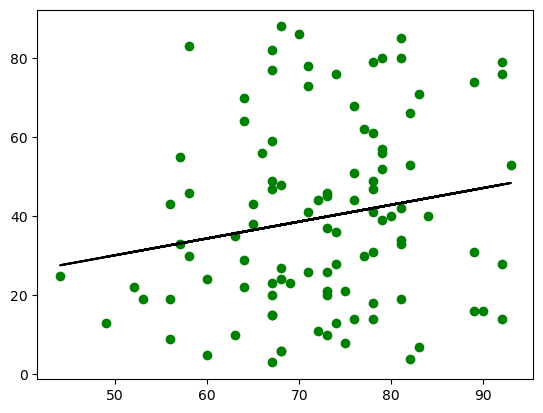

Media, journalism and communications


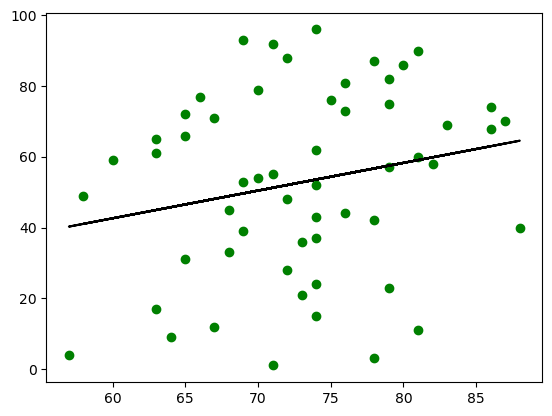

Computing


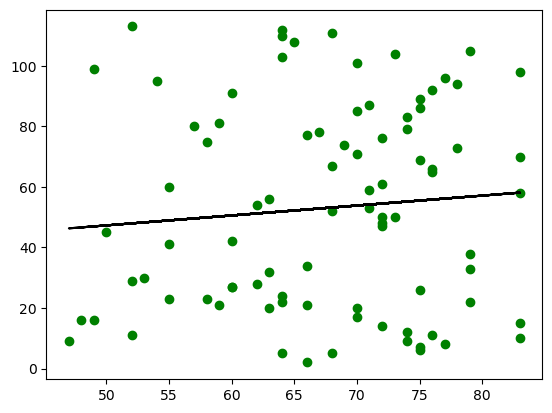

Medicine and dentistry


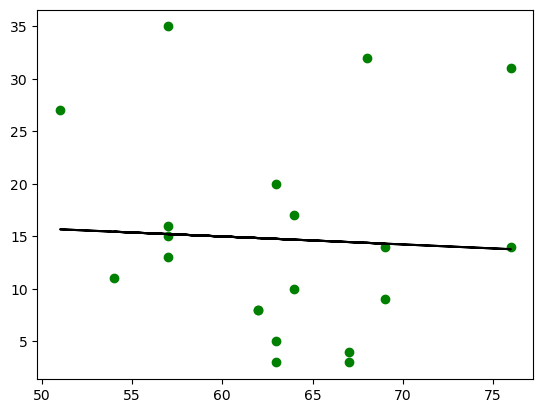

Combined and general studies


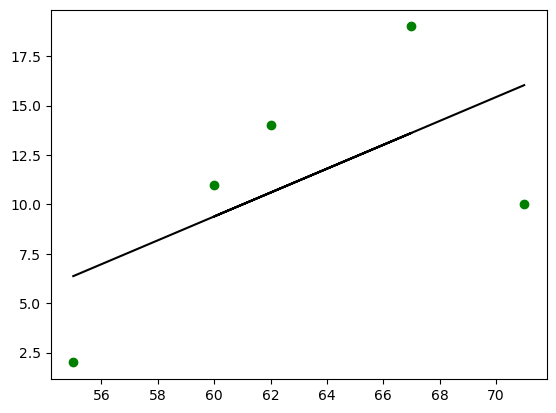

Geography, earth and environmental studies


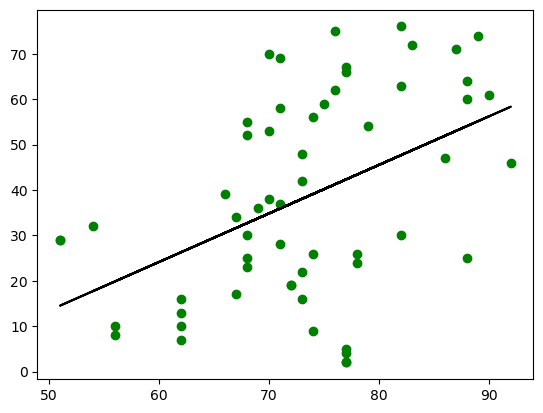

Historical, philosophical and religious studies


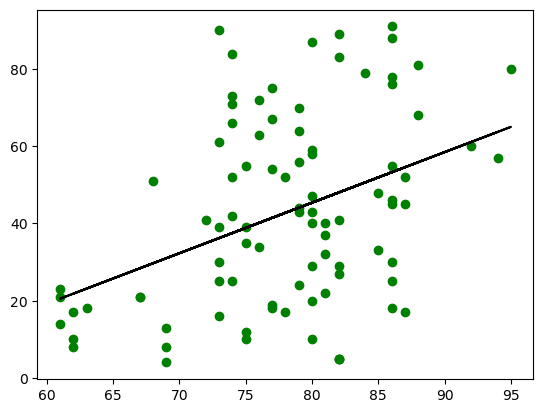

Law


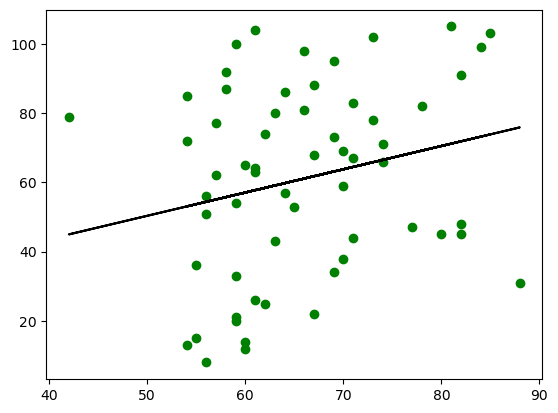

Mathematical sciences


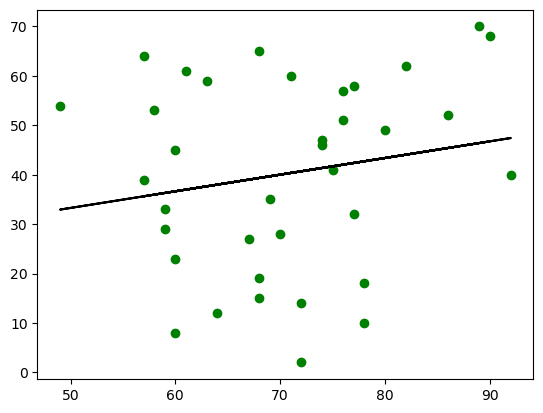

Psychology


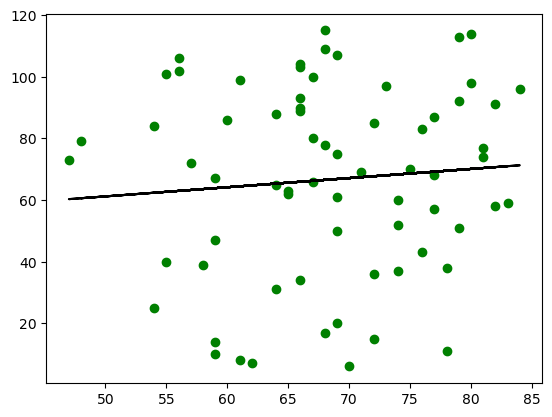

Veterinary sciences


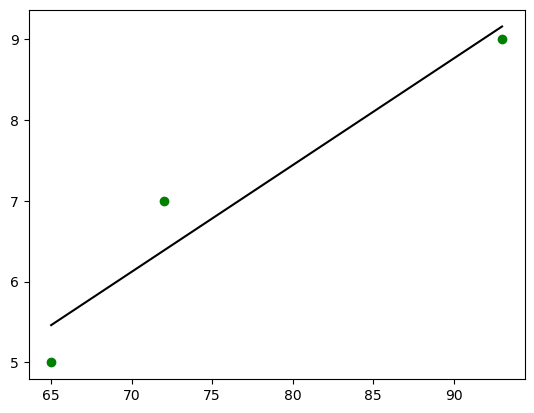

In [83]:
for key in subject_dfs:
    merged_df2 = subject_dfs[key]
    samplemodel = LinearRegression()
    sampledf = merged_df2[merged_df2['Question Number'].isin(['Scale03'])]
    samplemodel.fit(sampledf['Actual value'].values.reshape(-1, 1), sampledf['Rank'].values.reshape(-1, 1))
    plt.scatter(sampledf['Actual value'].values.reshape(-1, 1), sampledf['Rank'].values.reshape(-1, 1),color='g')
    plt.plot(sampledf['Actual value'].values.reshape(-1, 1), samplemodel.predict(sampledf['Actual value'].values.reshape(-1, 1)),color='k')
    print(key)
    plt.show()

In [84]:
sampledf['Actual value'].values

array([65., 72., 93.])

# 2022 rank table and 2021 nss data

In [85]:
# # Path to the folder containing the CSV files
# folder_path = 'table22'

# # List to store the dataframes
# dataframes = []

# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
        
#         # Read the CSV file while skipping the first 4 rows
#         df = pd.read_csv(file_path, skiprows=4)
#         # Add a column for the filename
        
#         subject = filename.replace('Complete_University_Guide_', '').replace('_2022.csv', '').replace('_', ' ')
#         df['Subject'] = subject

        
#         # Add the dataframe to the list
#         dataframes.append(df)

# # Concatenate all dataframes
# merged_df = pd.concat(dataframes, ignore_index=True)

# # Save the merged dataframe to a new CSV file
# output_file_path = os.path.join(folder_path, 'merged_file2.csv')
# merged_df.to_csv(output_file_path, index=False)

# print(f"Merged file saved to {output_file_path}")


In [86]:
merged_df22 = pd.read_csv('2022 Subjects Data/merged_file2.csv')
merged_df22['Year']= "2022"

In [87]:
df21 = pd.read_csv('NSS_taught_all21_sub.csv',encoding='latin1')
df21

ï»¿UKPRN                            Provider Subject Code  \
0      10007783              University of Aberdeen        CAH01   
1      10007783              University of Aberdeen        CAH01   
2      10007783              University of Aberdeen        CAH01   
3      10007783              University of Aberdeen        CAH01   
4      10007783              University of Aberdeen        CAH01   
...         ...                                 ...          ...   
95755  99999999  Brighton and Sussex Medical School        CAH01   
95756  99999999  Brighton and Sussex Medical School        CAH01   
95757  99999999  Brighton and Sussex Medical School        CAH01   
95758  99999999  Brighton and Sussex Medical School        CAH01   
95759  99999999  Brighton and Sussex Medical School        CAH01   

                      Subject         Level Question Number Answered 1  \
0      Medicine and dentistry  First degree             Q01         1%   
1      Medicine and dentistry  First degree             Q02         1%   
2      Medicine and dentistry  First degree             Q03         2%   
3      Medicine and dentistry  First degree             Q04         2%   
4      Medicine and dentistry  First degree         Scale01         1%   
...                       ...           ...             ...        ...   
95755  Medicine and dentistry  First degree             Q24         4%   
95756  Medicine and dentistry  First degree             Q25         1%   
95757  Medicine and dentistry  First degree         Scale08         2%   
95758  Medicine and dentistry  First degree             Q26         4%   
95759  Medicine and dentistry  First degree             Q27         2%   

      Answered 2 Answered 3 Answered 4 Answered 5  N/A  \
0             2%         4%        60%        33%    0   
1             1%         5%        62%        31%    0   
2             0%         4%        21%        74%    0   
3             2%        11%        31%        55%    0   
4             1%         6%        43%        48%    0   
...          ...        ...        ...        ...  ...   
95755         1%         6%        23%        66%    0   
95756         4%        17%        21%        57%    0   
95757         2%         8%        22%        66%    0   
95758         5%        22%        34%        35%    2   
95759         1%         2%        24%        71%    0   

      Confidence interval - min Actual value Confidence interval - max  \
0                           86%          93%                       96%   
1                           87%          93%                       97%   
2                           88%          94%                       97%   
3                           78%          86%                       91%   
4                           84%          92%                       96%   
...                         ...          ...                       ...   
95755                       81%          89%                       94%   
95756                       68%          78%                       85%   
95757                       80%          88%                       93%   
95758                       59%          70%                       78%   
95759                       88%          95%                       98%   

       Response  Sample Size  
0           121          188  
1           121          188  
2           121          188  
3           121          188  
4           121          188  
...         ...          ...  
95755       104          120  
95756       104          120  
95757       104          120  
95758       102          120  
95759       104          120  

[95760 rows x 17 columns]

In [88]:
df21['Subject'].unique()


array(['Medicine and dentistry', 'Subjects allied to medicine',
       'Biological and sport sciences', 'Psychology', 'Physical sciences',
       'Mathematical sciences', 'Engineering and technology', 'Computing',
       'Architecture, building and planning', 'Social sciences', 'Law',
       'Business and management', 'Language and area studies',
       'Historical, philosophical and religious studies',
       'Education and teaching',
       'Design, and creative and performing arts',
       'Geography, earth and environmental studies',
       'Agriculture, food and related studies', 'Veterinary sciences',
       'Media, journalism and communications',
       'Combined and general studies'], dtype=object)

In [89]:
merged_df22['Mapped Subject'] = merged_df22['Subject'].apply(map_subject)
print(merged_df22)

      Rank                                        Institution  \
0        1                          University of Strathclyde   
1        2  London School of Economics and Political Scien...   
2        3                              University of Warwick   
3        4                              University of Glasgow   
4        5                                University of Leeds   
...    ...                                                ...   
3849     6     Royal Veterinary College, University of London   
3850     7                              University of Bristol   
3851     8                         Writtle University College   
3852     9                               University of Surrey   
3853    10                           Anglia Ruskin University   

      Entry Standards  Student Satisfaction  Research Quality  \
0               210.0                  4.11              3.17   
1               173.0                  4.19              3.46   
2               169.0   

In [90]:
df21_subjects_set = set(df21['Subject'])
merged22_subjects_set = set(merged_df22['Mapped Subject'])
common_elements2 = df21_subjects_set.intersection(merged22_subjects_set)
df21_common = df21[df21['Subject'].isin(common_elements2)]
merged22_common = merged_df22[merged_df22['Mapped Subject'].isin(common_elements2)]
common_df2 = pd.merge(df21_common, merged22_common, left_on=['Provider', 'Subject'], right_on=['Institution', 'Mapped Subject'], how='inner')
print(common_df2.head())

   ï»¿UKPRN                Provider Subject Code               Subject_x  \
0  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
1  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
2  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
3  10007783  University of Aberdeen        CAH01  Medicine and dentistry   
4  10007783  University of Aberdeen        CAH01  Medicine and dentistry   

          Level Question Number Answered 1 Answered 2 Answered 3 Answered 4  \
0  First degree             Q01         1%         2%         4%        60%   
1  First degree             Q02         1%         1%         5%        62%   
2  First degree             Q03         2%         0%         4%        21%   
3  First degree             Q04         2%         2%        11%        31%   
4  First degree         Scale01         1%         1%         6%        43%   

   ... Entry Standards  Student Satisfaction Research Quality  \
0  

In [91]:

subject_dfs22 = {}
for subject in mapped_subjects:
    # Filter rows in df2_common and merged_common for the current subject
    df21_subject = df21_common[df21_common['Subject'] == subject]
    merged22_subject = merged22_common[merged22_common['Mapped Subject'] == subject]
    
    # Perform inner join on 'Provider'/'Institution'
    merged22_subject_df = pd.merge(df21_subject, merged22_subject, left_on='Provider', right_on='Institution', how='inner')
    
    # Store the dataframe in a dictionary
    subject_dfs22[subject] = merged22_subject_df

# Access individual dataframes by subject name
for subject, df in subject_dfs22.items():
    print(f"Dataframe for '{subject}':")
    print(df.head())
    print("\n")

Dataframe for 'Business and management':
   ï»¿UKPRN                Provider Subject Code                Subject_x  \
0  10007783  University of Aberdeen        CAH17  Business and management   
1  10007783  University of Aberdeen        CAH17  Business and management   
2  10007783  University of Aberdeen        CAH17  Business and management   
3  10007783  University of Aberdeen        CAH17  Business and management   
4  10007783  University of Aberdeen        CAH17  Business and management   

          Level Question Number Answered 1 Answered 2 Answered 3 Answered 4  \
0  First degree             Q01         2%         6%         8%        52%   
1  First degree             Q01         2%         6%         8%        52%   
2  First degree             Q02         3%        10%        18%        48%   
3  First degree             Q02         3%        10%        18%        48%   
4  First degree             Q03         3%        13%         7%        46%   

   ... Entry Standard

In [92]:
for key in subject_dfs22:
    subject_dfs22[key]['Actual value'] = subject_dfs22[key]['Actual value'].apply(extract_numeric_percentage)
    subject_dfs22[key]['Confidence interval - min'] = subject_dfs22[key]['Confidence interval - min'].apply(extract_numeric_percentage)
    subject_dfs22[key]['Confidence interval - max'] = subject_dfs22[key]['Confidence interval - max'].apply(extract_numeric_percentage)

# Scale Correlation

We calculate the correlations between Actual value and Rank for each scale within each 
subject's dataset, but only for subjects with at least 100 entries for Scale03. It generates a DataFrame of 
correlations for each scale question, sorts the DataFrame by absolute correlation values, and prints the 
top correlations for each subject.

In [93]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        scale_data = subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(scale_questions)]
        #scale_data['Actual value'] = scale_data['Actual value'].apply(lambda x: float(x.strip('%')))
        correlations = {}
        for scale in scale_questions:
            df_scale = scale_data[scale_data['Question Number'] == scale]
            correlation = df_scale['Actual value'].corr(df_scale['Rank'])
            correlations[scale] = correlation
        correlations_df = pd.DataFrame(list(correlations.items()), columns=['Scale', 'Correlation'])
        correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
        correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)
        print(key)
        print(correlations_df[:4])

Business and management
     Scale  Correlation  Abs Correlation
4  Scale05    -0.354150         0.354150
2  Scale03     0.316654         0.316654
5  Scale06    -0.279279         0.279279
0  Scale01    -0.180515         0.180515
Engineering and technology
     Scale  Correlation  Abs Correlation
6  Scale07    -0.356353         0.356353
5  Scale06    -0.342178         0.342178
2  Scale03     0.278896         0.278896
0  Scale01    -0.185703         0.185703
Language and area studies
     Scale  Correlation  Abs Correlation
2  Scale03     0.299387         0.299387
4  Scale05    -0.209920         0.209920
5  Scale06    -0.144701         0.144701
0  Scale01    -0.126725         0.126725
Social sciences
     Scale  Correlation  Abs Correlation
2  Scale03     0.332103         0.332103
6  Scale07     0.204482         0.204482
1  Scale02     0.181639         0.181639
7  Scale08     0.168708         0.168708
Design, and creative and performing arts
     Scale  Correlation  Abs Correlation
2  Sc

# Question Correlation

We calculate the correlations between Actual value and Rank for each question within each subject's dataset, but only for subjects with at least 100 entries for Scale03.

In [94]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        correlations = {}
        questions = subject_dfs22[key]['Question Number'].unique()
        for question in questions:
            df_question = subject_dfs22[key][subject_dfs22[key]['Question Number'] == question]
            correlation = df_question['Actual value'].corr(df_question['Rank'])
            correlations[question] = correlation
        correlations_df = pd.DataFrame(list(correlations.items()), columns=['Question Number', 'Correlation'])
        correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
        correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)
        print(key)
        print(correlations_df[:4])

Business and management
   Question Number  Correlation  Abs Correlation
14             Q12    -0.442104         0.442104
11             Q10     0.423324         0.423324
19             Q16    -0.390280         0.390280
12             Q11     0.389421         0.389421
Engineering and technology
   Question Number  Correlation  Abs Correlation
27             Q22    -0.414225         0.414225
28         Scale07    -0.356353         0.356353
2              Q03    -0.346085         0.346085
25         Scale06    -0.342178         0.342178
Language and area studies
   Question Number  Correlation  Abs Correlation
11             Q10     0.413687         0.413687
19             Q16    -0.375981         0.375981
13         Scale03     0.299387         0.299387
7              Q07     0.282435         0.282435
Social sciences
   Question Number  Correlation  Abs Correlation
11             Q10     0.454950         0.454950
7              Q07     0.352576         0.352576
12             Q11     0.

### FOR BOTH 2023 and 2022, Q10 and SCALE03 SHOWS MAX ABS. CORRELATION FOR MOST OF THE SUBJECTS

Business and management


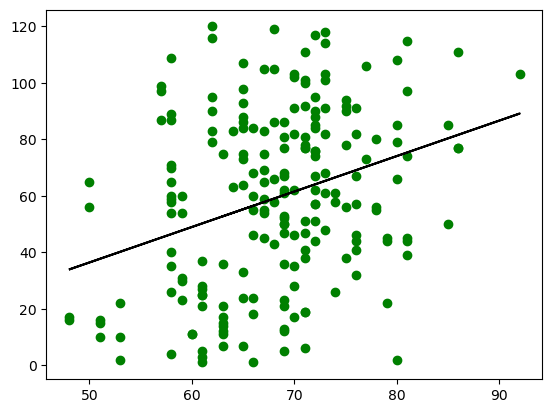

Engineering and technology


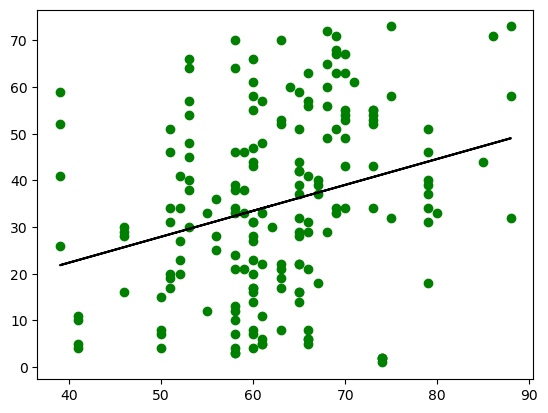

Language and area studies


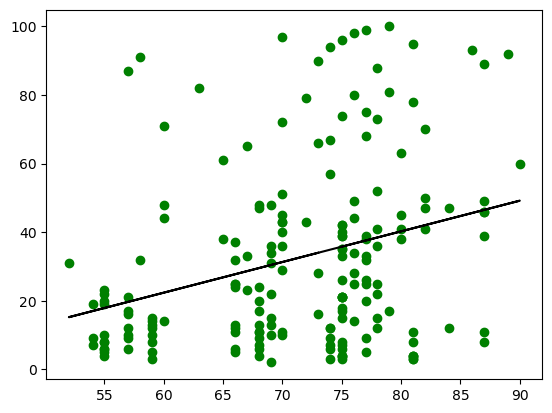

Social sciences


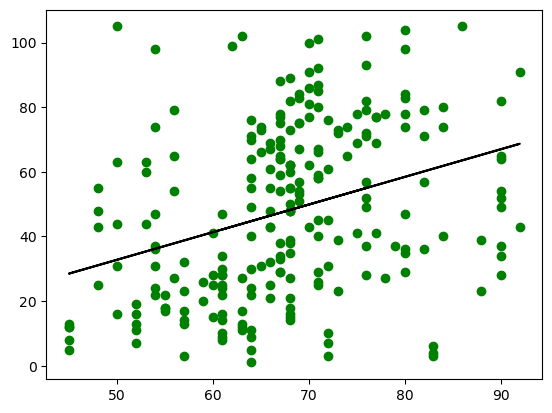

Design, and creative and performing arts


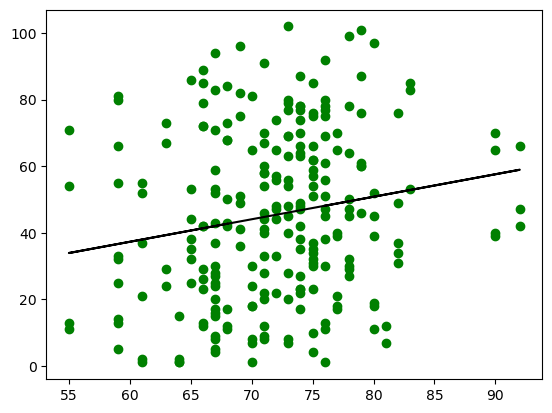

Biological and sport sciences


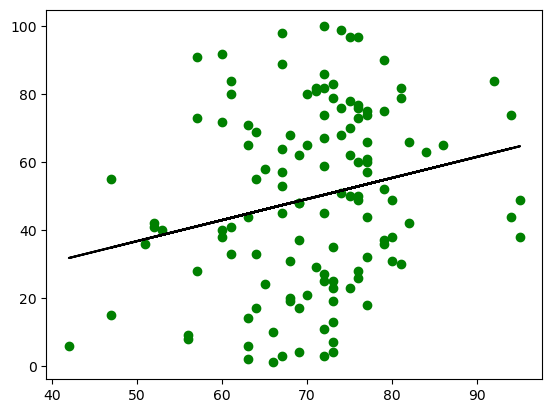

Subjects allied to medicine


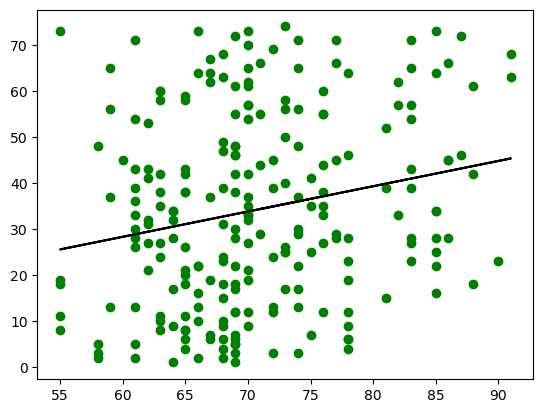

Education and teaching


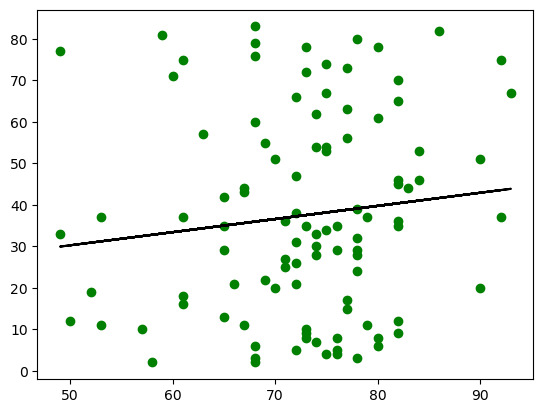

In [95]:
from sklearn.linear_model import LinearRegression
for merged in subject_dfs22:
    if len(subject_dfs22[merged][subject_dfs22[merged]['Question Number'].isin(['Scale03'])]) >= 100:
        samplemodel2 = LinearRegression()
        sampledf2 = subject_dfs22[merged][subject_dfs22[merged]['Question Number'].isin(['Scale03'])]
        samplemodel2.fit(sampledf2['Actual value'].values.reshape(-1, 1), sampledf2['Rank'].values.reshape(-1, 1))
        plt.figure()
        plt.scatter(sampledf2['Actual value'].values.reshape(-1, 1), sampledf2['Rank'].values.reshape(-1, 1),color='g')
        plt.plot(sampledf2['Actual value'].values.reshape(-1, 1), samplemodel2.predict(sampledf2['Actual value'].values.reshape(-1, 1)),color='k')
        print(merged)
        plt.show()
        plt.close()


In [96]:
list(subject_dfs22['Business and management'])

['ï»¿UKPRN',
 'Provider',
 'Subject Code',
 'Subject_x',
 'Level',
 'Question Number',
 'Answered 1',
 'Answered 2',
 'Answered 3',
 'Answered 4',
 'Answered 5',
 'N/A',
 'Confidence interval - min',
 'Actual value',
 'Confidence interval - max',
 'Response',
 'Sample Size',
 'Rank',
 'Institution',
 'Entry Standards',
 'Student Satisfaction',
 'Research Quality',
 'Research Intensity',
 'Graduate prospects outcomes',
 'Graduate prospects on track',
 'Overall Score',
 'Subject_y',
 'Year',
 'Mapped Subject']

In [97]:
list(subject_dfs['Business and management'])

['UKPRN',
 'Provider',
 'Subject Code',
 'Subject_x',
 'Level',
 'Question Number',
 'Answered 1',
 'Answered 2',
 'Answered 3',
 'Answered 4',
 'Answered 5',
 'N/A',
 'Confidence interval - min',
 'Actual value',
 'Confidence interval - max',
 'Response',
 'Sample Size',
 'Rank',
 'Institution',
 'Entry Standards',
 'Student Satisfaction',
 'Research Quality',
 'Graduate prospects outcomes',
 'Graduate prospects on track',
 'Overall Score',
 'Subject_y',
 'Year',
 'Mapped Subject']

## Most correlation {Question} = Q10

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

# Custom scorer functions for RMSE and MAE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

### Multiple regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [102]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
import math

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = LinearRegression() 
        #print(X_test[0])
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions))


Business and management  root_mean_squared_error :  38.19639632647901
Business and management  mean_absolute_error :  30.078349718675128
Engineering and technology  root_mean_squared_error :  31.577325042163558
Engineering and technology  mean_absolute_error :  25.95130058997483
Language and area studies  root_mean_squared_error :  28.63707680505738
Language and area studies  mean_absolute_error :  24.485166016974805
Social sciences  root_mean_squared_error :  40.684847396365264
Social sciences  mean_absolute_error :  32.32233699438389
Design, and creative and performing arts  root_mean_squared_error :  29.822735018899845
Design, and creative and performing arts  mean_absolute_error :  24.41349708478003
Biological and sport sciences  root_mean_squared_error :  41.62725006906933
Biological and sport sciences  mean_absolute_error :  31.547183337203165
Subjects allied to medicine  root_mean_squared_error :  23.50068993198353
Subjects allied to medicine  mean_absolute_error :  19.729077686

### Cross-validation (5 fold)

In [103]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        

        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)

        model = LinearRegression()

        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-29.21630295 -30.11597511 -26.75800435 -29.26856245 -34.2050451 ]
Business and management Mean RMSE:  29.912777992765438
Business and management 5 fold MAE [-24.20860046 -25.29024064 -21.82857544 -23.81693908 -28.85060754]
Business and management Mean MAE:  24.798992634497903
Engineering and technology 5 fold RMSE [-18.36829734 -16.07514061 -17.08047924 -18.17996586 -17.07515594]
Engineering and technology Mean RMSE:  17.355807798130456
Engineering and technology 5 fold MAE [-15.58527789 -13.87662556 -13.90530293 -14.99791957 -14.68128866]
Engineering and technology Mean MAE:  14.609282924904303
Language and area studies 5 fold RMSE [-21.69873444 -19.88866578 -19.97507942 -18.8207356  -21.73340365]
Language and area studies Mean RMSE:  20.423323777860467
Language and area studies 5 fold MAE [-16.81859731 -16.43689276 -14.79450798 -14.45656845 -17.86073405]
Language and area studies Mean MAE:  16.073460107868748
Social sciences 5 fold RMSE [-26.25524

### Multiple regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [104]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = LinearRegression() 
        #print(X_test[0])
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  8.803694445357904
Business and management  mean_absolute_error :  6.452759407110626
Engineering and technology  root_mean_squared_error :  11.338933783467786
Engineering and technology  mean_absolute_error :  8.476516184674063
Language and area studies  root_mean_squared_error :  10.015073569052813
Language and area studies  mean_absolute_error :  7.273477699382057
Social sciences  root_mean_squared_error :  12.9936542108563
Social sciences  mean_absolute_error :  10.061411523591063
Design, and creative and performing arts  root_mean_squared_error :  10.278191431928496
Design, and creative and performing arts  mean_absolute_error :  7.717729321019667
Biological and sport sciences  root_mean_squared_error :  6.86322034230438
Biological and sport sciences  mean_absolute_error :  5.840140309299332
Subjects allied to medicine  root_mean_squared_error :  15.527099780634833
Subjects allied to medicine  mean_absolute_error :  12.457170682251

### Cross-validation (5 fold)

In [105]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        

        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)

        model = LinearRegression()

        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-7.30445096 -7.23956966 -6.6723363  -6.81959128 -8.14950935]
Business and management Mean RMSE:  7.237091509276205
Business and management 5 fold MAE [-5.86766485 -5.72952969 -5.63920315 -5.54154724 -6.59489396]
Business and management Mean MAE:  5.8745677800944485
Engineering and technology 5 fold RMSE [-9.06371542 -7.84198494 -7.89355351 -8.16459799 -8.82817762]
Engineering and technology Mean RMSE:  8.358405896427254
Engineering and technology 5 fold MAE [-6.6325623  -5.63885647 -6.03760725 -5.71598024 -6.44873865]
Engineering and technology Mean MAE:  6.094748981480783
Language and area studies 5 fold RMSE [-4.68815156 -6.55559856 -5.67576283 -6.14030405 -8.1455982 ]
Language and area studies Mean RMSE:  6.241083040005752
Language and area studies 5 fold MAE [-3.58415211 -3.83042862 -3.95704457 -4.42134169 -5.68753014]
Language and area studies Mean MAE:  4.296099427515986
Social sciences 5 fold RMSE [ -8.90002572 -10.52097251  -7.76751483  -9.5

### Random Forest regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [106]:
from sklearn.ensemble import RandomForestRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  39.483186103858884
Business and management  mean_absolute_error :  31.864317612212346
Engineering and technology  root_mean_squared_error :  17.222598768791563
Engineering and technology  mean_absolute_error :  14.150213263219397
Language and area studies  root_mean_squared_error :  31.06393549990867
Language and area studies  mean_absolute_error :  26.71739605880231
Social sciences  root_mean_squared_error :  26.88809995302271
Social sciences  mean_absolute_error :  22.60478508217446
Design, and creative and performing arts  root_mean_squared_error :  29.51934501767416
Design, and creative and performing arts  mean_absolute_error :  23.36832569959802
Biological and sport sciences  root_mean_squared_error :  26.542862160944008
Biological and sport sciences  mean_absolute_error :  22.21994773519164
Subjects allied to medicine  root_mean_squared_error :  21.38640809579536
Subjects allied to medicine  mean_absolute_error :  17.8308489934

### Cross-validation (5 fold)

In [107]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-20.28322423 -23.95265624 -19.89285515 -22.61768451 -24.57360204]
Business and management Mean RMSE:  22.264004433350447
Business and management 5 fold MAE [-16.16237235 -18.98416236 -14.96646051 -18.30700687 -19.48359175]
Business and management Mean MAE:  17.580718769386486
Engineering and technology 5 fold RMSE [-14.87770886 -14.7807764  -15.45957051 -14.34729398 -15.20055589]
Engineering and technology Mean RMSE:  14.933181126979713
Engineering and technology 5 fold MAE [-11.27676877 -12.26095886 -11.74742696 -11.63475066 -11.39523136]
Engineering and technology Mean MAE:  11.6630273230724
Language and area studies 5 fold RMSE [-23.22185067 -17.81389228 -23.08274939 -20.1865954  -22.16946011]
Language and area studies Mean RMSE:  21.294909566943346
Language and area studies 5 fold MAE [-16.65298738 -12.65006237 -17.92325043 -15.34529899 -16.58601808]
Language and area studies Mean MAE:  15.831523448947369
Social sciences 5 fold RMSE [-24.4450263

### Random Forest regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [108]:
from sklearn.ensemble import RandomForestRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  8.569420086151645
Business and management  mean_absolute_error :  6.525301891091364
Engineering and technology  root_mean_squared_error :  13.164285713220643
Engineering and technology  mean_absolute_error :  10.165682637063002
Language and area studies  root_mean_squared_error :  8.213034512662261
Language and area studies  mean_absolute_error :  5.531120882116619
Social sciences  root_mean_squared_error :  13.089064856670015
Social sciences  mean_absolute_error :  9.995248454839162
Design, and creative and performing arts  root_mean_squared_error :  10.41314908470916
Design, and creative and performing arts  mean_absolute_error :  7.7192268539991735
Biological and sport sciences  root_mean_squared_error :  6.380670663360773
Biological and sport sciences  mean_absolute_error :  5.276471544715447
Subjects allied to medicine  root_mean_squared_error :  15.585621737138641
Subjects allied to medicine  mean_absolute_error :  12.4645958766

### Cross-validation (5 fold)

In [109]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-5.75139656 -6.15716621 -5.90172281 -5.94573618 -6.97583124]
Business and management Mean RMSE:  6.146370601771311
Business and management 5 fold MAE [-4.58827711 -4.8851027  -4.77442596 -4.68741115 -5.42755256]
Business and management Mean MAE:  4.872553893623275
Engineering and technology 5 fold RMSE [-8.50559685 -6.62247579 -8.70984434 -7.30932134 -8.19533379]
Engineering and technology Mean RMSE:  7.868514423000207
Engineering and technology 5 fold MAE [-6.27298916 -4.72696894 -6.46272815 -5.27196831 -6.02944304]
Engineering and technology Mean MAE:  5.752819521592125
Language and area studies 5 fold RMSE [-4.49927358 -5.21846958 -6.64229633 -5.43464765 -7.50820393]
Language and area studies Mean RMSE:  5.860578214229963
Language and area studies 5 fold MAE [-3.36172417 -3.11856222 -4.6858894  -4.11206011 -4.67629156]
Language and area studies Mean MAE:  3.9909054908230694
Social sciences 5 fold RMSE [-8.77625702 -9.66652392 -8.60984678 -9.61291

### Decision Tree regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [110]:
from sklearn.tree  import DecisionTreeRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = DecisionTreeRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  44.00451713075245
Business and management  mean_absolute_error :  35.48086124401914
Engineering and technology  root_mean_squared_error :  17.848029225639
Engineering and technology  mean_absolute_error :  14.159509202453988
Language and area studies  root_mean_squared_error :  33.71837189216953
Language and area studies  mean_absolute_error :  27.87935606060606
Social sciences  root_mean_squared_error :  39.56296335053421
Social sciences  mean_absolute_error :  31.72087020648967
Design, and creative and performing arts  root_mean_squared_error :  36.43314686145262
Design, and creative and performing arts  mean_absolute_error :  29.365550595238094
Biological and sport sciences  root_mean_squared_error :  28.23964663866074
Biological and sport sciences  mean_absolute_error :  22.841463414634145
Subjects allied to medicine  root_mean_squared_error :  23.54914607279358
Subjects allied to medicine  mean_absolute_error :  19.5830779054917


### Cross-validation (5 fold)

In [111]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        model = DecisionTreeRegressor(random_state = 0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-20.81090359 -23.32559395 -20.59147415 -22.69732242 -22.91584441]
Business and management Mean RMSE:  22.068227703580114
Business and management 5 fold MAE [-16.48995984 -19.28714859 -16.05284553 -18.14939024 -17.58841463]
Business and management Mean MAE:  17.5135517680478
Engineering and technology 5 fold RMSE [-16.34257269 -14.98603752 -16.2588357  -15.02154634 -15.58284103]
Engineering and technology Mean RMSE:  15.638366655713025
Engineering and technology 5 fold MAE [-11.8384058  -12.18357488 -12.21618357 -11.87745098 -11.83137255]
Engineering and technology Mean MAE:  11.9893975561239
Language and area studies 5 fold RMSE [-23.17983165 -19.7803689  -26.98339615 -20.82250595 -24.02719183]
Language and area studies Mean RMSE:  22.958658896700463
Language and area studies 5 fold MAE [-15.91503588 -12.7665362  -20.31030093 -14.7489418  -17.89596561]
Language and area studies Mean MAE:  16.327356082844098
Social sciences 5 fold RMSE [-27.21573921 

### Decision Tree regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [112]:
from sklearn.tree  import DecisionTreeRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = DecisionTreeRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  9.918989113273579
Business and management  mean_absolute_error :  7.565231259968103
Engineering and technology  root_mean_squared_error :  13.985890233751245
Engineering and technology  mean_absolute_error :  11.049304703476482
Language and area studies  root_mean_squared_error :  8.640558677618227
Language and area studies  mean_absolute_error :  5.817613636363634
Social sciences  root_mean_squared_error :  13.136392349413093
Social sciences  mean_absolute_error :  10.021681415929203
Design, and creative and performing arts  root_mean_squared_error :  10.205284449341148
Design, and creative and performing arts  mean_absolute_error :  7.701941964285714
Biological and sport sciences  root_mean_squared_error :  6.577131482385416
Biological and sport sciences  mean_absolute_error :  5.232520325203252
Subjects allied to medicine  root_mean_squared_error :  16.18052358801703
Subjects allied to medicine  mean_absolute_error :  13.0205683269

### Cross-validation (5 fold)

In [113]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        model = DecisionTreeRegressor(random_state = 0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-6.12953408 -6.14247507 -5.84386078 -6.15016917 -6.6617309 ]
Business and management Mean RMSE:  6.185554000300057
Business and management 5 fold MAE [-5.12188755 -4.70963855 -4.74786585 -4.72245935 -5.33414634]
Business and management Mean MAE:  4.927199529826623
Engineering and technology 5 fold RMSE [-9.17502346 -6.92891115 -9.49354249 -7.65159685 -8.1926486 ]
Engineering and technology Mean RMSE:  8.288344511087452
Engineering and technology 5 fold MAE [-6.44628019 -4.97161836 -7.0173913  -5.57446078 -6.24365196]
Engineering and technology Mean MAE:  6.050680520034101
Language and area studies 5 fold RMSE [-4.59685713 -5.30699397 -6.19812846 -5.19460383 -7.83504715]
Language and area studies Mean RMSE:  5.82632610637877
Language and area studies 5 fold MAE [-3.35636008 -3.33970809 -4.32204696 -3.84427083 -5.03938492]
Language and area studies Mean MAE:  3.9803541757266068
Social sciences 5 fold RMSE [ -8.60323657 -10.69876398  -8.83543449 -10.25

### Gradient Boosting regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Rank

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = GradientBoostingRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  35.8138160295791
Business and management  mean_absolute_error :  29.80976521500343
Engineering and technology  root_mean_squared_error :  18.444147198788222
Engineering and technology  mean_absolute_error :  14.859874203750564
Language and area studies  root_mean_squared_error :  30.641867065792518
Language and area studies  mean_absolute_error :  26.778182733520325
Social sciences  root_mean_squared_error :  30.050622386154874
Social sciences  mean_absolute_error :  24.435073977624196
Design, and creative and performing arts  root_mean_squared_error :  31.152780481970666
Design, and creative and performing arts  mean_absolute_error :  25.033360420601458
Biological and sport sciences  root_mean_squared_error :  27.745301740354776
Biological and sport sciences  mean_absolute_error :  22.531762506902524
Subjects allied to medicine  root_mean_squared_error :  22.107528813927942
Subjects allied to medicine  mean_absolute_error :  18.40579

### Cross-validation (5 fold)

In [115]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        model = GradientBoostingRegressor(random_state = 0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-22.17963546 -23.74108919 -20.39458014 -22.24170978 -26.22820137]
Business and management Mean RMSE:  22.957043189992984
Business and management 5 fold MAE [-17.04628182 -18.74024149 -15.68255473 -17.53395912 -20.27825504]
Business and management Mean MAE:  17.85625844298435
Engineering and technology 5 fold RMSE [-14.72368634 -13.40453656 -14.5274878  -13.84107026 -14.53077114]
Engineering and technology Mean RMSE:  14.205510419033573
Engineering and technology 5 fold MAE [-11.77606673 -11.24788123 -10.92400045 -11.14509337 -11.43008217]
Engineering and technology Mean MAE:  11.304624790031804
Language and area studies 5 fold RMSE [-21.17255451 -17.97717857 -22.57296843 -18.30456469 -21.77939218]
Language and area studies Mean RMSE:  20.361331675280063
Language and area studies 5 fold MAE [-15.01889055 -12.37866681 -17.19144876 -13.42549947 -16.1572994 ]
Language and area studies Mean MAE:  14.834360996449792
Social sciences 5 fold RMSE [-23.364787

### Gradient boosting regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = GradientBoostingRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  7.559053495114904
Business and management  mean_absolute_error :  5.93466845443152
Engineering and technology  root_mean_squared_error :  13.490853445521655
Engineering and technology  mean_absolute_error :  10.538155574107426
Language and area studies  root_mean_squared_error :  7.946210625749793
Language and area studies  mean_absolute_error :  5.2180236736031125
Social sciences  root_mean_squared_error :  13.01043274664584
Social sciences  mean_absolute_error :  9.89410888012664
Design, and creative and performing arts  root_mean_squared_error :  10.30560075054641
Design, and creative and performing arts  mean_absolute_error :  7.560807187755088
Biological and sport sciences  root_mean_squared_error :  6.505205745979449
Biological and sport sciences  mean_absolute_error :  5.289732907702051
Subjects allied to medicine  root_mean_squared_error :  15.691133169071826
Subjects allied to medicine  mean_absolute_error :  12.5711883420736

### Cross-validation (5 fold)

In [117]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        model = GradientBoostingRegressor(random_state = 0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-5.92794268 -5.97259996 -5.73991089 -5.76081745 -6.8845193 ]
Business and management Mean RMSE:  6.057158057022913
Business and management 5 fold MAE [-4.84908981 -4.63422264 -4.58984159 -4.59466242 -5.33750981]
Business and management Mean MAE:  4.801065256288555
Engineering and technology 5 fold RMSE [-8.42096103 -6.47253327 -8.36643502 -6.96737516 -7.83872207]
Engineering and technology Mean RMSE:  7.613205309567998
Engineering and technology 5 fold MAE [-6.07286196 -4.83840422 -6.33867907 -4.83771422 -5.78111456]
Engineering and technology Mean MAE:  5.573754802817103
Language and area studies 5 fold RMSE [-4.14392374 -5.47234307 -5.88126301 -5.05453007 -6.87999077]
Language and area studies Mean RMSE:  5.4864101312612545
Language and area studies 5 fold MAE [-3.15784576 -3.18341868 -4.08659982 -3.76801157 -4.37866733]
Language and area studies Mean MAE:  3.714908632213617
Social sciences 5 fold RMSE [-8.37396737 -9.88185603 -7.74838014 -9.86594

## Implementing Neural Network - MLPRegressor
### MLPregression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Rank

In [118]:
from sklearn.neural_network import MLPRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = MLPRegressor(random_state = 1, max_iter= 10000)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  25.953539272455206
Business and management  mean_absolute_error :  21.527759242455662
Engineering and technology  root_mean_squared_error :  47.27680841171774
Engineering and technology  mean_absolute_error :  43.18555699404392
Language and area studies  root_mean_squared_error :  32.89372559264036
Language and area studies  mean_absolute_error :  30.345368533255495
Social sciences  root_mean_squared_error :  39.96838222792863
Social sciences  mean_absolute_error :  35.36241504339775
Design, and creative and performing arts  root_mean_squared_error :  40.53375033596197
Design, and creative and performing arts  mean_absolute_error :  38.749141472581776
Biological and sport sciences  root_mean_squared_error :  31.219696681655524
Biological and sport sciences  mean_absolute_error :  25.962334550374116
Subjects allied to medicine  root_mean_squared_error :  55.176572989796604
Subjects allied to medicine  mean_absolute_error :  52.75674540

### MLPregression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [119]:
from sklearn.neural_network import MLPRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Q10'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q10'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = MLPRegressor(random_state = 1, max_iter= 10000)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  15.87904417931921
Business and management  mean_absolute_error :  11.678378328991602
Engineering and technology  root_mean_squared_error :  18.01158907657486
Engineering and technology  mean_absolute_error :  13.190423584906116
Language and area studies  root_mean_squared_error :  10.70178204992262
Language and area studies  mean_absolute_error :  7.7364515997438295
Social sciences  root_mean_squared_error :  16.026857308695373
Social sciences  mean_absolute_error :  12.773495852053564
Design, and creative and performing arts  root_mean_squared_error :  15.7328577053566
Design, and creative and performing arts  mean_absolute_error :  11.506982533127529
Biological and sport sciences  root_mean_squared_error :  8.535243337408845
Biological and sport sciences  mean_absolute_error :  6.973255881751925
Subjects allied to medicine  root_mean_squared_error :  18.899788414357072
Subjects allied to medicine  mean_absolute_error :  15.475417892

Crossfold validation is not performed for this model as it is showing the high RMSE and MAE values compared to other models. Which clearly states that this model is not supportive.

## Most correlation {Scale} = Scale03

### Multiple regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [120]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
import math

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = LinearRegression() 
        #print(X_test[0])
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 





Business and management  root_mean_squared_error :  34.89209530342029
Business and management  mean_absolute_error :  28.222803172574
Engineering and technology  root_mean_squared_error :  24.499663202145193
Engineering and technology  mean_absolute_error :  20.360114288642002
Language and area studies  root_mean_squared_error :  25.49830846254872
Language and area studies  mean_absolute_error :  21.444256262629324
Social sciences  root_mean_squared_error :  34.69490256647822
Social sciences  mean_absolute_error :  27.975740946224604
Design, and creative and performing arts  root_mean_squared_error :  27.911174100057604
Design, and creative and performing arts  mean_absolute_error :  23.242420952769372
Biological and sport sciences  root_mean_squared_error :  34.63978334156059
Biological and sport sciences  mean_absolute_error :  27.92592659292872
Subjects allied to medicine  root_mean_squared_error :  22.747225790582924
Subjects allied to medicine  mean_absolute_error :  19.3262890228

### Cross-validation (5 fold)

In [121]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        model = LinearRegression()
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-28.94513653 -30.86196955 -26.65580099 -29.05064098 -34.03504106]
Business and management Mean RMSE:  29.9097178226408
Business and management 5 fold MAE [-24.54711869 -26.21422964 -21.54524499 -23.74970504 -28.59393252]
Business and management Mean MAE:  24.930046176724222
Engineering and technology 5 fold RMSE [-18.67447843 -16.76627011 -16.82004184 -18.09507824 -17.09925401]
Engineering and technology Mean RMSE:  17.49102452613141
Engineering and technology 5 fold MAE [-15.82155975 -14.20673619 -13.85931281 -15.03892334 -14.81051168]
Engineering and technology Mean MAE:  14.747408753114627
Language and area studies 5 fold RMSE [-21.75830919 -20.37406594 -20.42447317 -18.87476406 -22.06016185]
Language and area studies Mean RMSE:  20.698354841606566
Language and area studies 5 fold MAE [-16.86607152 -16.76615215 -15.56068907 -14.4638364  -18.11373234]
Language and area studies Mean MAE:  16.354096294886297
Social sciences 5 fold RMSE [-26.57493479

### Multiple regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [122]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = LinearRegression() 
        #print(X_test[0])
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  7.936948508875705
Business and management  mean_absolute_error :  5.900570888367607
Engineering and technology  root_mean_squared_error :  11.41524130881567
Engineering and technology  mean_absolute_error :  8.443541161955732
Language and area studies  root_mean_squared_error :  8.686132847876042
Language and area studies  mean_absolute_error :  6.071855993300889
Social sciences  root_mean_squared_error :  12.499430448179288
Social sciences  mean_absolute_error :  9.50992726318756
Design, and creative and performing arts  root_mean_squared_error :  10.100908431602802
Design, and creative and performing arts  mean_absolute_error :  7.53533456959965
Biological and sport sciences  root_mean_squared_error :  6.412927208656224
Biological and sport sciences  mean_absolute_error :  5.399010087246665
Subjects allied to medicine  root_mean_squared_error :  15.423554473215347
Subjects allied to medicine  mean_absolute_error :  12.45194244675592

### Cross-validation (5 fold)

In [123]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        model = LinearRegression()
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-7.20533388 -7.35914051 -6.68499701 -6.88199468 -8.17201372]
Business and management Mean RMSE:  7.260695959119337
Business and management 5 fold MAE [-5.84428691 -5.80398808 -5.57560871 -5.54420279 -6.53709724]
Business and management Mean MAE:  5.86103674486883
Engineering and technology 5 fold RMSE [-9.07769172 -8.26344497 -7.8484645  -7.97685286 -8.83197638]
Engineering and technology Mean RMSE:  8.399686086024229
Engineering and technology 5 fold MAE [-6.63802707 -5.93588264 -5.97458012 -5.57241196 -6.43319125]
Engineering and technology Mean MAE:  6.1108186086680325
Language and area studies 5 fold RMSE [-4.72317314 -6.5393546  -5.5567331  -6.02101583 -8.05534358]
Language and area studies Mean RMSE:  6.1791240487977035
Language and area studies 5 fold MAE [-3.64932848 -3.883335   -3.91109597 -4.43677779 -5.56087718]
Language and area studies Mean MAE:  4.288282883947451
Social sciences 5 fold RMSE [ -8.74560124 -10.1304855   -7.51850168  -9.6

### Random Forest regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [124]:
from sklearn.ensemble import RandomForestRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  37.37322352966909
Business and management  mean_absolute_error :  29.645068352699933
Engineering and technology  root_mean_squared_error :  16.5655346899336
Engineering and technology  mean_absolute_error :  13.744451991430518
Language and area studies  root_mean_squared_error :  27.569809863164533
Language and area studies  mean_absolute_error :  23.429144796176047
Social sciences  root_mean_squared_error :  27.14726132490201
Social sciences  mean_absolute_error :  22.967031710914455
Design, and creative and performing arts  root_mean_squared_error :  29.829212602765924
Design, and creative and performing arts  mean_absolute_error :  24.051003610724592
Biological and sport sciences  root_mean_squared_error :  26.21840200122209
Biological and sport sciences  mean_absolute_error :  21.939831591173057
Subjects allied to medicine  root_mean_squared_error :  21.22163075760415
Subjects allied to medicine  mean_absolute_error :  17.75760370

### Cross-validation (5 fold)

In [125]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-21.30012447 -24.88567923 -18.74814235 -23.91952573 -25.84168898]
Business and management Mean RMSE:  22.93903215308266
Business and management 5 fold MAE [-16.95470166 -19.5447619  -14.68285569 -18.75361643 -20.7933101 ]
Business and management Mean MAE:  18.145849159705023
Engineering and technology 5 fold RMSE [-14.35346024 -14.8683257  -15.44732899 -13.75656439 -15.58087958]
Engineering and technology Mean RMSE:  14.801311783134437
Engineering and technology 5 fold MAE [-10.75404229 -12.25626409 -11.82255118 -11.00749416 -11.33015958]
Engineering and technology Mean MAE:  11.434102260886787
Language and area studies 5 fold RMSE [-22.19617406 -17.78935606 -22.9002769  -19.86669625 -22.53303484]
Language and area studies Mean RMSE:  21.057107623158636
Language and area studies 5 fold MAE [-16.01576299 -12.29667848 -18.11166205 -15.26053433 -16.62184064]
Language and area studies Mean MAE:  15.661295696771841
Social sciences 5 fold RMSE [-24.321973

### Random Forest regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [126]:
from sklearn.ensemble import RandomForestRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  8.37163423987368
Business and management  mean_absolute_error :  6.2690124174071515
Engineering and technology  root_mean_squared_error :  13.149434404067417
Engineering and technology  mean_absolute_error :  10.239071696367708
Language and area studies  root_mean_squared_error :  8.324354795554715
Language and area studies  mean_absolute_error :  5.620486953545191
Social sciences  root_mean_squared_error :  13.212226630981583
Social sciences  mean_absolute_error :  10.127072798145807
Design, and creative and performing arts  root_mean_squared_error :  10.328775542735542
Design, and creative and performing arts  mean_absolute_error :  7.752765554138323
Biological and sport sciences  root_mean_squared_error :  6.441448483685677
Biological and sport sciences  mean_absolute_error :  5.34610704607046
Subjects allied to medicine  root_mean_squared_error :  15.670356301549283
Subjects allied to medicine  mean_absolute_error :  12.6896938970

### Cross-validation (5 fold)

In [127]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        model = RandomForestRegressor(n_estimators=10, random_state=0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-5.96288332 -6.28428419 -5.91595307 -5.79225865 -6.81013454]
Business and management Mean RMSE:  6.153102755587232
Business and management 5 fold MAE [-4.838644   -5.05354418 -4.69356911 -4.67713197 -5.36391725]
Business and management Mean MAE:  4.92536130060311
Engineering and technology 5 fold RMSE [-8.92437501 -7.40586341 -8.74188015 -7.32685283 -7.97561327]
Engineering and technology Mean RMSE:  8.074916933084152
Engineering and technology 5 fold MAE [-6.67666049 -5.33773913 -6.59052663 -5.15478344 -6.01638445]
Engineering and technology Mean MAE:  5.955218827401405
Language and area studies 5 fold RMSE [-4.63175639 -5.17617836 -6.44747714 -5.46081121 -7.54040313]
Language and area studies Mean RMSE:  5.851325247799405
Language and area studies 5 fold MAE [-3.43312593 -3.01271616 -4.42641103 -4.08193478 -4.70312822]
Language and area studies Mean MAE:  3.931463223874096
Social sciences 5 fold RMSE [-8.20061016 -9.90812674 -8.38114531 -9.6721058

### Decision Tree regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [128]:
from sklearn.tree  import DecisionTreeRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = DecisionTreeRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  42.60598786579419
Business and management  mean_absolute_error :  33.228867623604465
Engineering and technology  root_mean_squared_error :  17.311975594296136
Engineering and technology  mean_absolute_error :  14.033742331288343
Language and area studies  root_mean_squared_error :  29.72482545838126
Language and area studies  mean_absolute_error :  24.274945887445885
Social sciences  root_mean_squared_error :  33.66264964425379
Social sciences  mean_absolute_error :  27.058480825958704
Design, and creative and performing arts  root_mean_squared_error :  34.72796344003576
Design, and creative and performing arts  mean_absolute_error :  27.80215773809524
Biological and sport sciences  root_mean_squared_error :  27.751437375796666
Biological and sport sciences  mean_absolute_error :  22.32520325203252
Subjects allied to medicine  root_mean_squared_error :  22.702365116097997
Subjects allied to medicine  mean_absolute_error :  19.21060025

### Cross-validation (5 fold)

In [129]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        model = DecisionTreeRegressor(random_state = 0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-20.81090359 -28.35446885 -19.64516704 -19.99477405 -23.48760701]
Business and management Mean RMSE:  22.458584106080174
Business and management 5 fold MAE [-16.48995984 -21.32931727 -15.49796748 -16.4004065  -17.55487805]
Business and management Mean MAE:  17.454505828190815
Engineering and technology 5 fold RMSE [-15.79186229 -15.53592403 -15.99514004 -13.75574004 -16.11720197]
Engineering and technology Mean RMSE:  15.439173674368746
Engineering and technology 5 fold MAE [-11.36086957 -12.61111111 -12.03985507 -10.93627451 -12.14852941]
Engineering and technology Mean MAE:  11.819327934072179
Language and area studies 5 fold RMSE [-23.02360666 -18.15029946 -25.50668368 -21.77856784 -24.2107617 ]
Language and area studies Mean RMSE:  22.533983867943675
Language and area studies 5 fold MAE [-16.03261579 -12.11927593 -19.31782407 -16.09732143 -17.6911045 ]
Language and area studies Mean MAE:  16.251628343118067
Social sciences 5 fold RMSE [-25.51439

### Decision tree regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs Overall Score

In [130]:
from sklearn.tree  import DecisionTreeRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = DecisionTreeRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  9.551247583920999
Business and management  mean_absolute_error :  7.368819776714513
Engineering and technology  root_mean_squared_error :  14.149857643065472
Engineering and technology  mean_absolute_error :  11.277269938650306
Language and area studies  root_mean_squared_error :  8.670541619894529
Language and area studies  mean_absolute_error :  6.074318181818182
Social sciences  root_mean_squared_error :  13.582294398076769
Social sciences  mean_absolute_error :  10.393510324483778
Design, and creative and performing arts  root_mean_squared_error :  10.158235385309457
Design, and creative and performing arts  mean_absolute_error :  7.652313988095238
Biological and sport sciences  root_mean_squared_error :  6.669130134280444
Biological and sport sciences  mean_absolute_error :  5.353252032520325
Subjects allied to medicine  root_mean_squared_error :  16.126262997653125
Subjects allied to medicine  mean_absolute_error :  13.302024265

### Cross-validation (5 fold)

In [131]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        model = DecisionTreeRegressor(random_state = 0)
        
        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)


        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-6.18402285 -6.41115368 -6.23709073 -5.74579851 -6.55877947]
Business and management Mean RMSE:  6.22736904813822
Business and management 5 fold MAE [-5.15       -4.98795181 -5.13699187 -4.45569106 -5.27276423]
Business and management Mean MAE:  5.000679792340092
Engineering and technology 5 fold RMSE [-8.62646446 -9.83024981 -9.6732556  -7.92615923 -8.52357701]
Engineering and technology Mean RMSE:  8.915941224866149
Engineering and technology 5 fold MAE [-6.31028986 -6.22475845 -7.22560386 -5.80453431 -6.15627451]
Engineering and technology Mean MAE:  6.344292199488491
Language and area studies 5 fold RMSE [-4.86263531 -5.24320774 -6.40981367 -5.29357912 -7.6724771 ]
Language and area studies Mean RMSE:  5.896342588495576
Language and area studies 5 fold MAE [-3.56252446 -3.24416014 -4.60294974 -4.05584491 -4.85558862]
Language and area studies Mean MAE:  4.064213574508952
Social sciences 5 fold RMSE [ -8.98694979 -10.27106808  -8.98204273 -10.822

### Gradient Boosting regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = GradientBoostingRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  34.83556087761915
Business and management  mean_absolute_error :  28.238317906226
Engineering and technology  root_mean_squared_error :  17.299157657885512
Engineering and technology  mean_absolute_error :  14.328541668708528
Language and area studies  root_mean_squared_error :  29.088050692318646
Language and area studies  mean_absolute_error :  24.947804674334087
Social sciences  root_mean_squared_error :  29.31983370370438
Social sciences  mean_absolute_error :  24.38693771510853
Design, and creative and performing arts  root_mean_squared_error :  29.731990420205932
Design, and creative and performing arts  mean_absolute_error :  23.935124644781165
Biological and sport sciences  root_mean_squared_error :  27.557765985247467
Biological and sport sciences  mean_absolute_error :  22.620813400552166
Subjects allied to medicine  root_mean_squared_error :  21.855549302561865
Subjects allied to medicine  mean_absolute_error :  18.07352639

### Cross-validation (5 fold)

In [133]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min', 'Actual value', 'Confidence interval - max', 'Response']],
             subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min', 'Actual value', 'Confidence interval - max', 'Response']]]
        
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],
             subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]

        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)

        model = GradientBoostingRegressor(random_state=0)

        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-21.39593409 -23.30051687 -20.54165513 -22.47275628 -26.78805813]
Business and management Mean RMSE:  22.89978410019377
Business and management 5 fold MAE [-16.72175527 -18.34152022 -16.01091261 -17.22979393 -21.12636829]
Business and management Mean MAE:  17.88607006558609
Engineering and technology 5 fold RMSE [-13.86003858 -14.39223642 -14.3660443  -13.52602135 -14.32008964]
Engineering and technology Mean RMSE:  14.092886059327117
Engineering and technology 5 fold MAE [-10.91480556 -12.16812613 -11.20234948 -10.80898187 -11.33339251]
Engineering and technology Mean MAE:  11.285531111919743
Language and area studies 5 fold RMSE [-21.62633617 -17.84577559 -21.62893307 -18.75446103 -21.45540299]
Language and area studies Mean RMSE:  20.26218176992601
Language and area studies 5 fold MAE [-15.2561195  -12.69132338 -15.99280821 -14.2463434  -15.79346472]
Language and area studies Mean MAE:  14.79601184181924
Social sciences 5 fold RMSE [-24.22640578 

### Gradient Boosting regression ('Confidence interval - min','Actual value','Confidence interval - max', 'Response') vs rank

In [134]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = GradientBoostingRegressor(random_state = 0)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 


Business and management  root_mean_squared_error :  7.674870732634754
Business and management  mean_absolute_error :  5.986879663383628
Engineering and technology  root_mean_squared_error :  13.33307827732656
Engineering and technology  mean_absolute_error :  10.470100865800259
Language and area studies  root_mean_squared_error :  8.160200975033732
Language and area studies  mean_absolute_error :  5.411330913791779
Social sciences  root_mean_squared_error :  13.15215856065166
Social sciences  mean_absolute_error :  9.967515045475675
Design, and creative and performing arts  root_mean_squared_error :  10.365599618812361
Design, and creative and performing arts  mean_absolute_error :  7.656318634962242
Biological and sport sciences  root_mean_squared_error :  6.647127998535567
Biological and sport sciences  mean_absolute_error :  5.334692150838029
Subjects allied to medicine  root_mean_squared_error :  15.697185033369735
Subjects allied to medicine  mean_absolute_error :  12.700490032437

### Cross-validation (5 fold)

In [135]:

# Create scoring objects
scoring_rmse = make_scorer(rmse, greater_is_better=False)
scoring_mae = make_scorer(mae, greater_is_better=False)

for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min', 'Actual value', 'Confidence interval - max', 'Response']],
             subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min', 'Actual value', 'Confidence interval - max', 'Response']]]
        
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Overall Score'],
             subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]

        # Combine X and y
        X_combined = np.concatenate(X, axis=0)
        y_combined = np.concatenate(y, axis=0)

        model = GradientBoostingRegressor(random_state=0)

        # Perform 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=101)
        
        # Cross-validate and calculate RMSE and MAE
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_rmse)
        mae_scores = cross_val_score(model, X_combined, y_combined, cv=kf, scoring=scoring_mae)
        print(key,"5 fold RMSE",rmse_scores)
        print(key, 'Mean RMSE: ', -np.mean(rmse_scores))
        print(key,"5 fold MAE",mae_scores)
        print(key, 'Mean MAE: ', -np.mean(mae_scores))


Business and management 5 fold RMSE [-5.77075801 -5.86009736 -6.14963217 -5.78287318 -6.97388281]
Business and management Mean RMSE:  6.107448708635837
Business and management 5 fold MAE [-4.59111168 -4.63579224 -4.89235952 -4.55827911 -5.46138535]
Business and management Mean MAE:  4.827785581981485
Engineering and technology 5 fold RMSE [-8.13794101 -6.77561749 -7.94409946 -6.91438595 -7.8180337 ]
Engineering and technology Mean RMSE:  7.518015520304836
Engineering and technology 5 fold MAE [-5.85565029 -4.97199523 -6.11120985 -4.71161632 -5.77865   ]
Engineering and technology Mean MAE:  5.485824340023445
Language and area studies 5 fold RMSE [-4.0157515  -5.22161989 -5.96871095 -5.04595082 -6.98143055]
Language and area studies Mean RMSE:  5.446692742102362
Language and area studies 5 fold MAE [-3.00136093 -3.06852962 -4.16452837 -3.67539224 -4.41381044]
Language and area studies Mean MAE:  3.664724319568456
Social sciences 5 fold RMSE [-8.16699398 -9.64602706 -7.62886415 -9.686549

## Multi-layer Perceptron Regressor

In [136]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Rank']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = MLPRegressor(random_state = 1, max_iter= 10000)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  28.575060361121597
Business and management  mean_absolute_error :  23.87406497197688
Engineering and technology  root_mean_squared_error :  19.46596994807752
Engineering and technology  mean_absolute_error :  14.203328294551312
Language and area studies  root_mean_squared_error :  27.598202430463818
Language and area studies  mean_absolute_error :  23.574758756447956
Social sciences  root_mean_squared_error :  25.94691485610184
Social sciences  mean_absolute_error :  21.118462794235707
Design, and creative and performing arts  root_mean_squared_error :  24.369832123478467
Design, and creative and performing arts  mean_absolute_error :  19.769793673004738
Biological and sport sciences  root_mean_squared_error :  29.283526151099046
Biological and sport sciences  mean_absolute_error :  24.72105569708446
Subjects allied to medicine  root_mean_squared_error :  22.259880689876677
Subjects allied to medicine  mean_absolute_error :  17.844862

In [137]:
for key in subject_dfs22:
    if len(subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]) >= 100:
        X = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Q03'])][['Confidence interval - min','Actual value','Confidence interval - max', 'Response']]]
        y = [subject_dfs[key][subject_dfs[key]['Question Number'].isin(['Scale03'])]['Rank'],subject_dfs22[key][subject_dfs22[key]['Question Number'].isin(['Scale03'])]['Overall Score']]
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101) 
        model = MLPRegressor(random_state = 1, max_iter= 10000)
        model.fit(X_train[0],y_train[0])
        predictions = model.predict(X_test[0]) 
        print(key,' root_mean_squared_error : ',  math. sqrt( mean_squared_error(y_test[0], predictions))) 
        print(key,' mean_absolute_error : ', mean_absolute_error(y_test[0], predictions)) 

Business and management  root_mean_squared_error :  33.17810398275356
Business and management  mean_absolute_error :  26.696064689872152
Engineering and technology  root_mean_squared_error :  44.4110956356551
Engineering and technology  mean_absolute_error :  40.81048888988787
Language and area studies  root_mean_squared_error :  54.70714333941744
Language and area studies  mean_absolute_error :  49.801619568657664
Social sciences  root_mean_squared_error :  35.39771144957476
Social sciences  mean_absolute_error :  29.802074194541696
Design, and creative and performing arts  root_mean_squared_error :  43.57333245374697
Design, and creative and performing arts  mean_absolute_error :  38.08154326398819
Biological and sport sciences  root_mean_squared_error :  38.97112071943742
Biological and sport sciences  mean_absolute_error :  32.29154795853971
Subjects allied to medicine  root_mean_squared_error :  45.68370887722858
Subjects allied to medicine  mean_absolute_error :  40.4470806325168

Crossfold validation is not performed for this model as it is showing the high RMSE and MAE values compared to other models. Which clearly states that this model is not supportive.